## Notebook for the Viszualization of first principal vectors for 2H Data using grouped Barplots

### ToDo:
    - Documentation
    - fix paths

In [1]:
import pandas as pd
import os
import errno  # handy system and path functions
import sys  # to get file system encoding
import glob
import locale
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib import rcParams
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
         'figure.autolayout': True}
rcParams.update(params)
from scipy import signal
from scipy import stats
from sklearn import preprocessing
import matplotlib.ticker as ticker


# np.set_printoptions(precision=28)
# pd.set_option('precision', 28)


# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('colorblind')

/home/michael/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# # Set the style globally

# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
# plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.dpi'] = 300

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


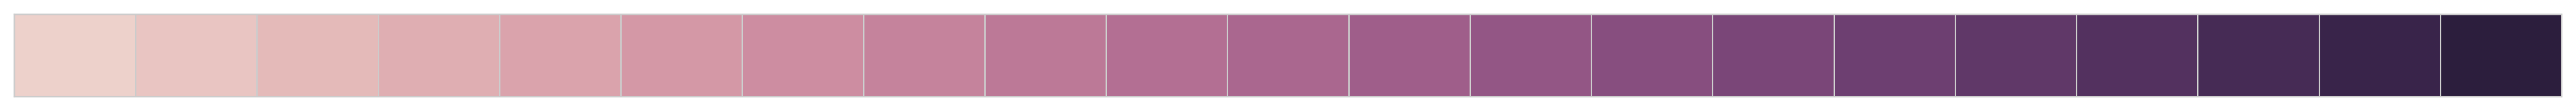

In [3]:
sns.palplot(sns.cubehelix_palette(21))


In [4]:
blues = sns.color_palette("PuBu", 11)
reds = sns.color_palette("OrRd", 11)
greens = sns.color_palette("BuGn", 11)
purples = sns.cubehelix_palette(11)
labels = ['hand_1 x', 'hand_1 y','hand_1 z','wrist x','wrist y','wrist z','lower_arm x','lower_arm y','lower_arm z','upper_arm x', 'upper_arm y','upper_arm z', 'shoulder x','shoulder y', 'shoulder z']

m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


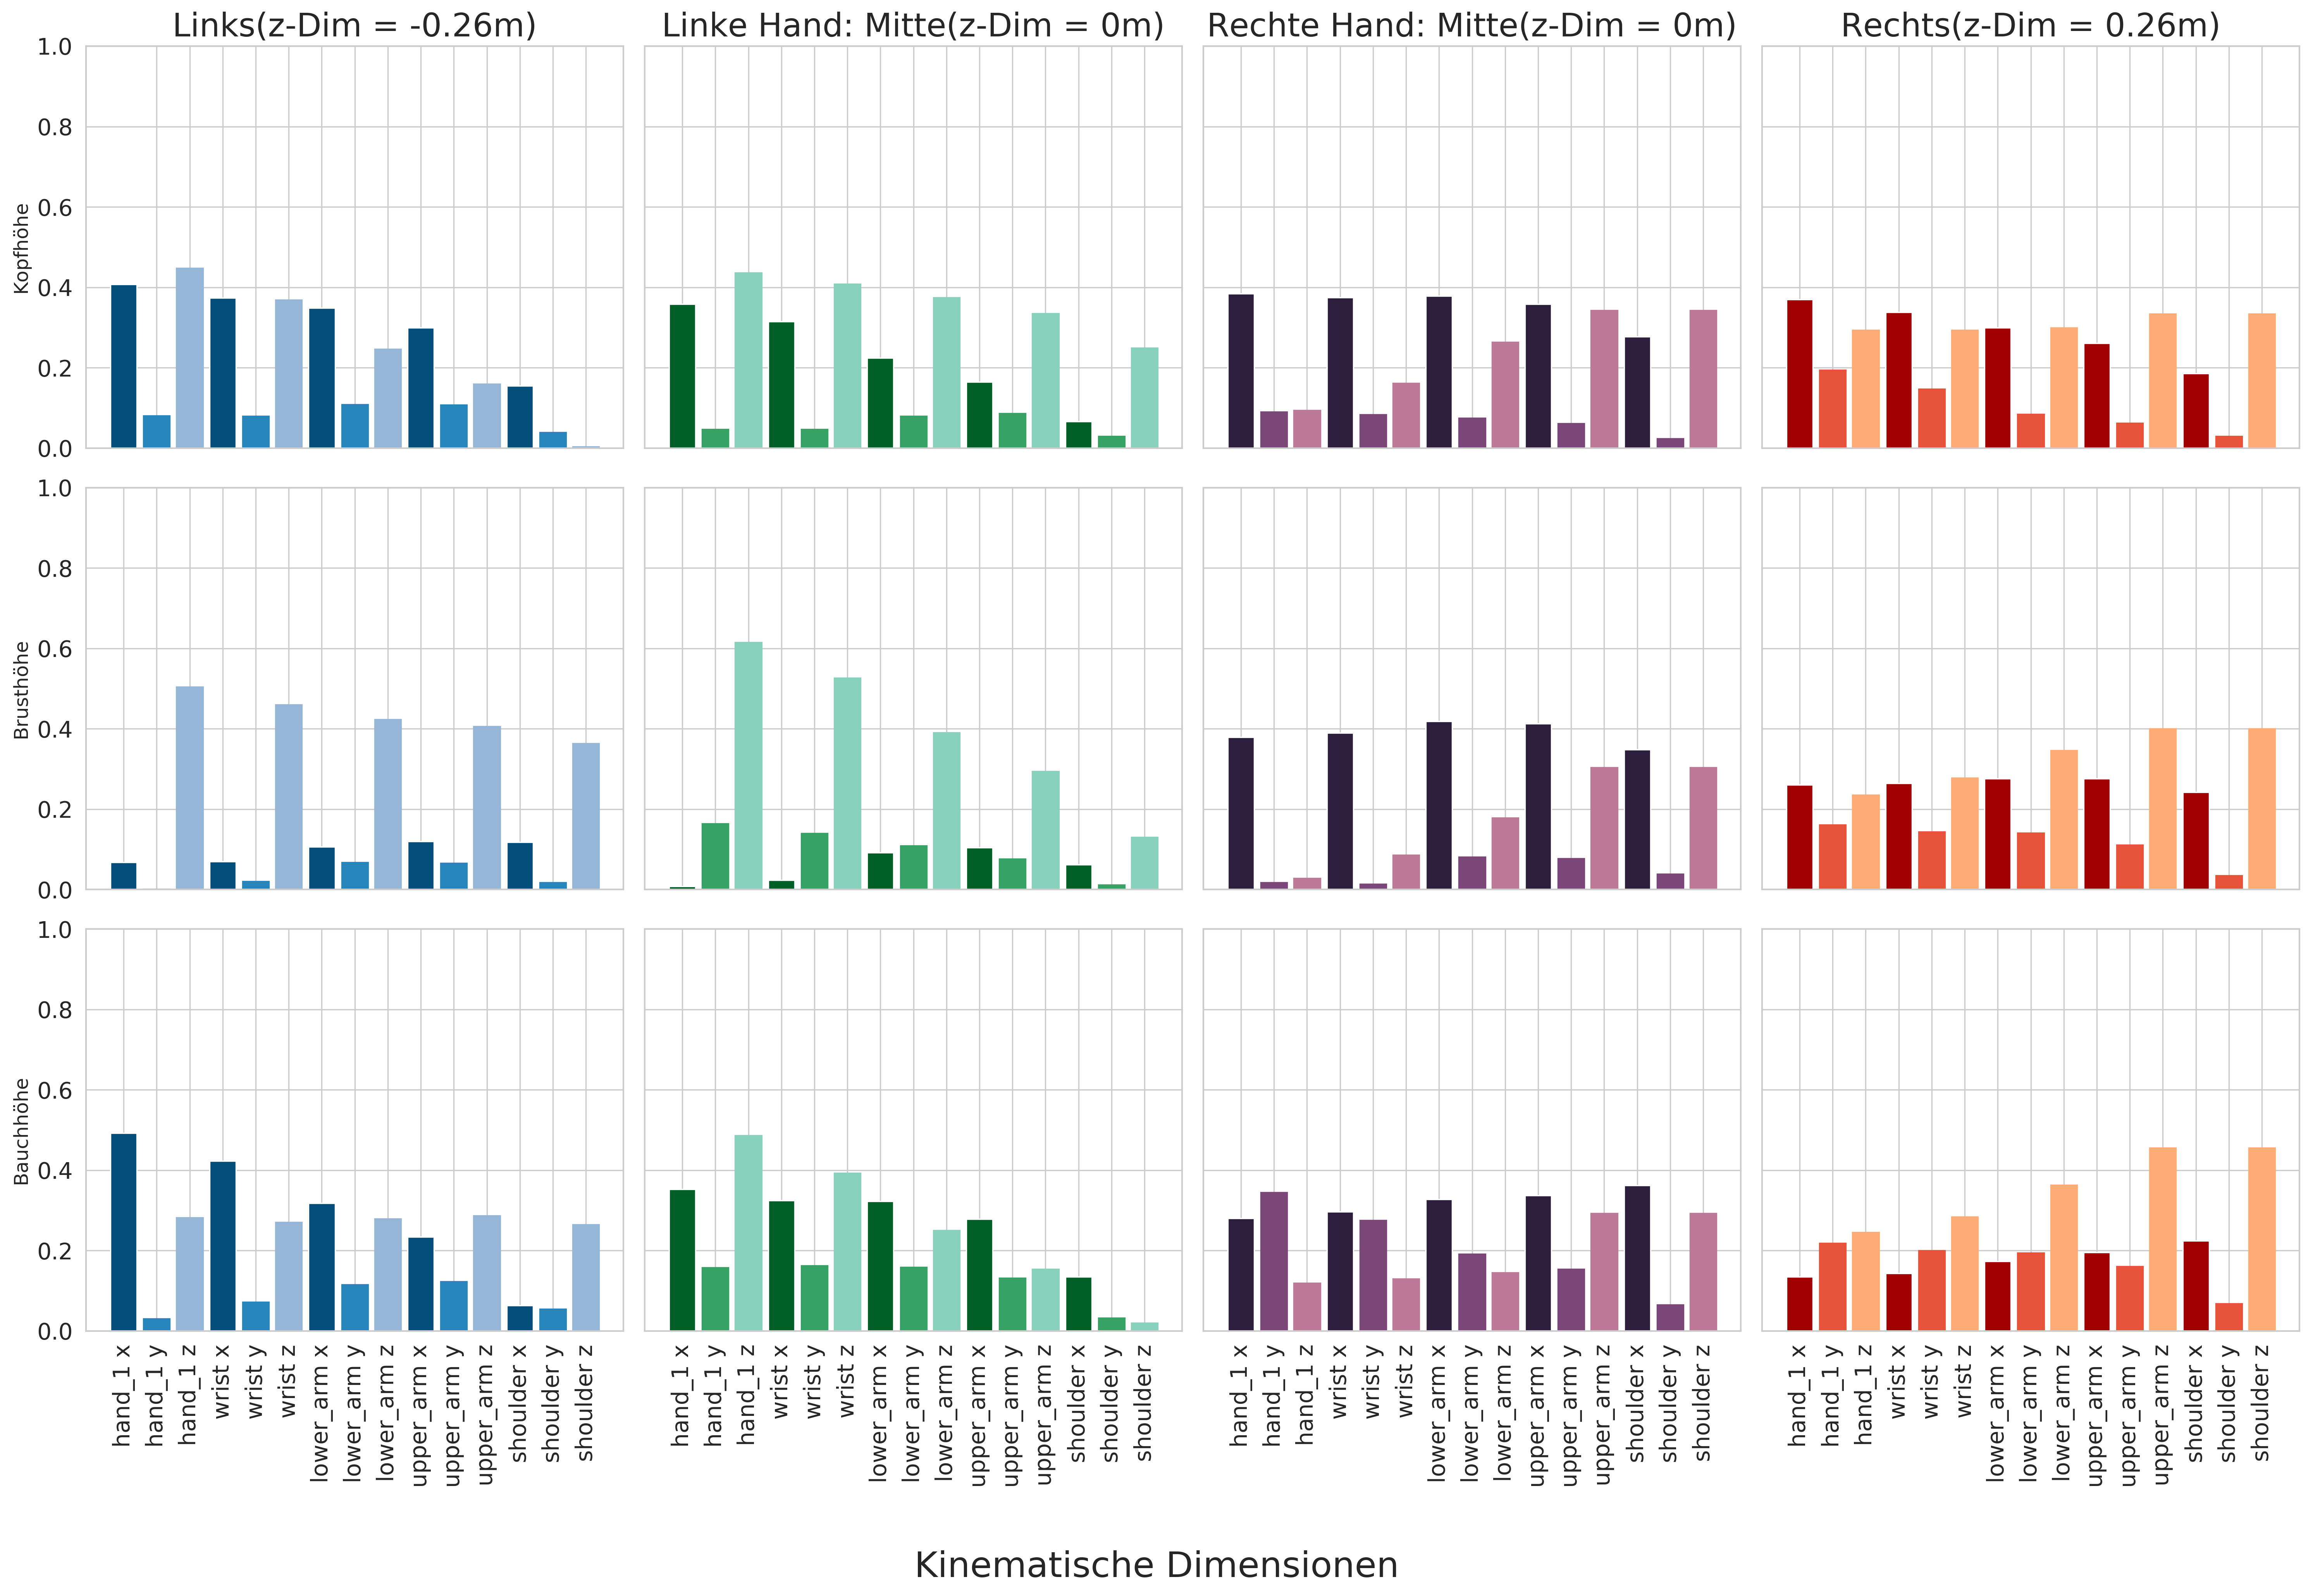

m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


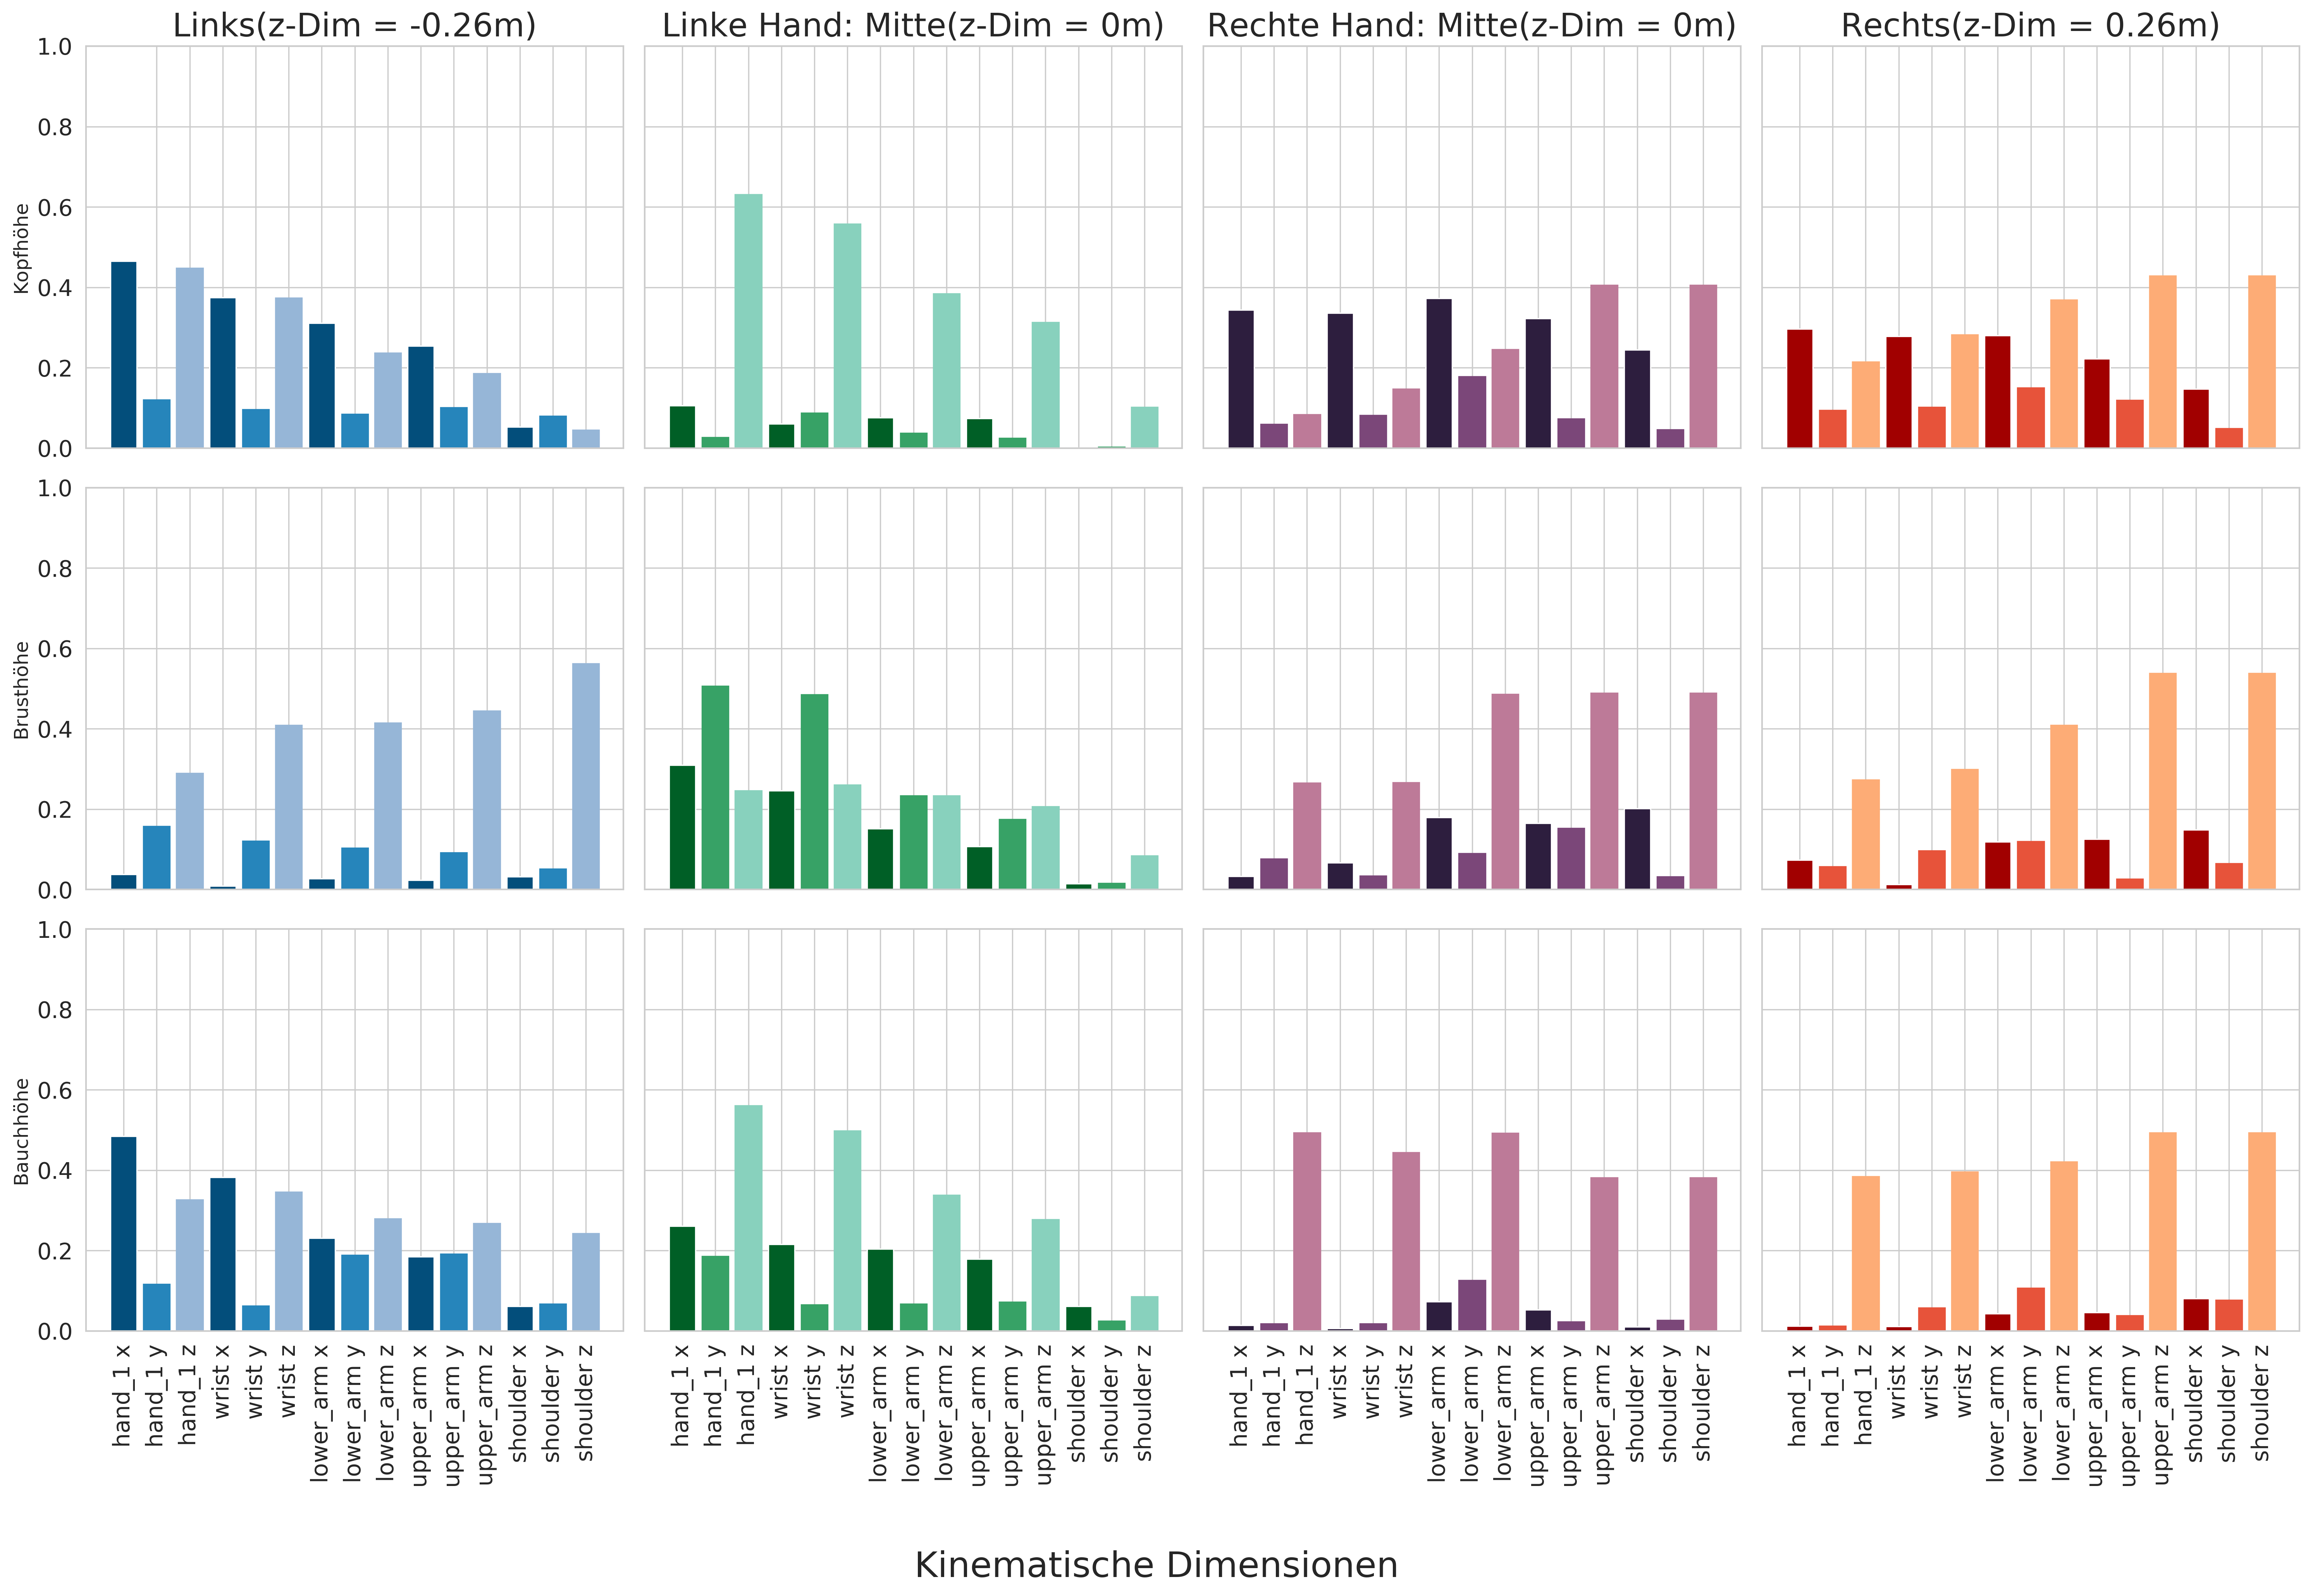

m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


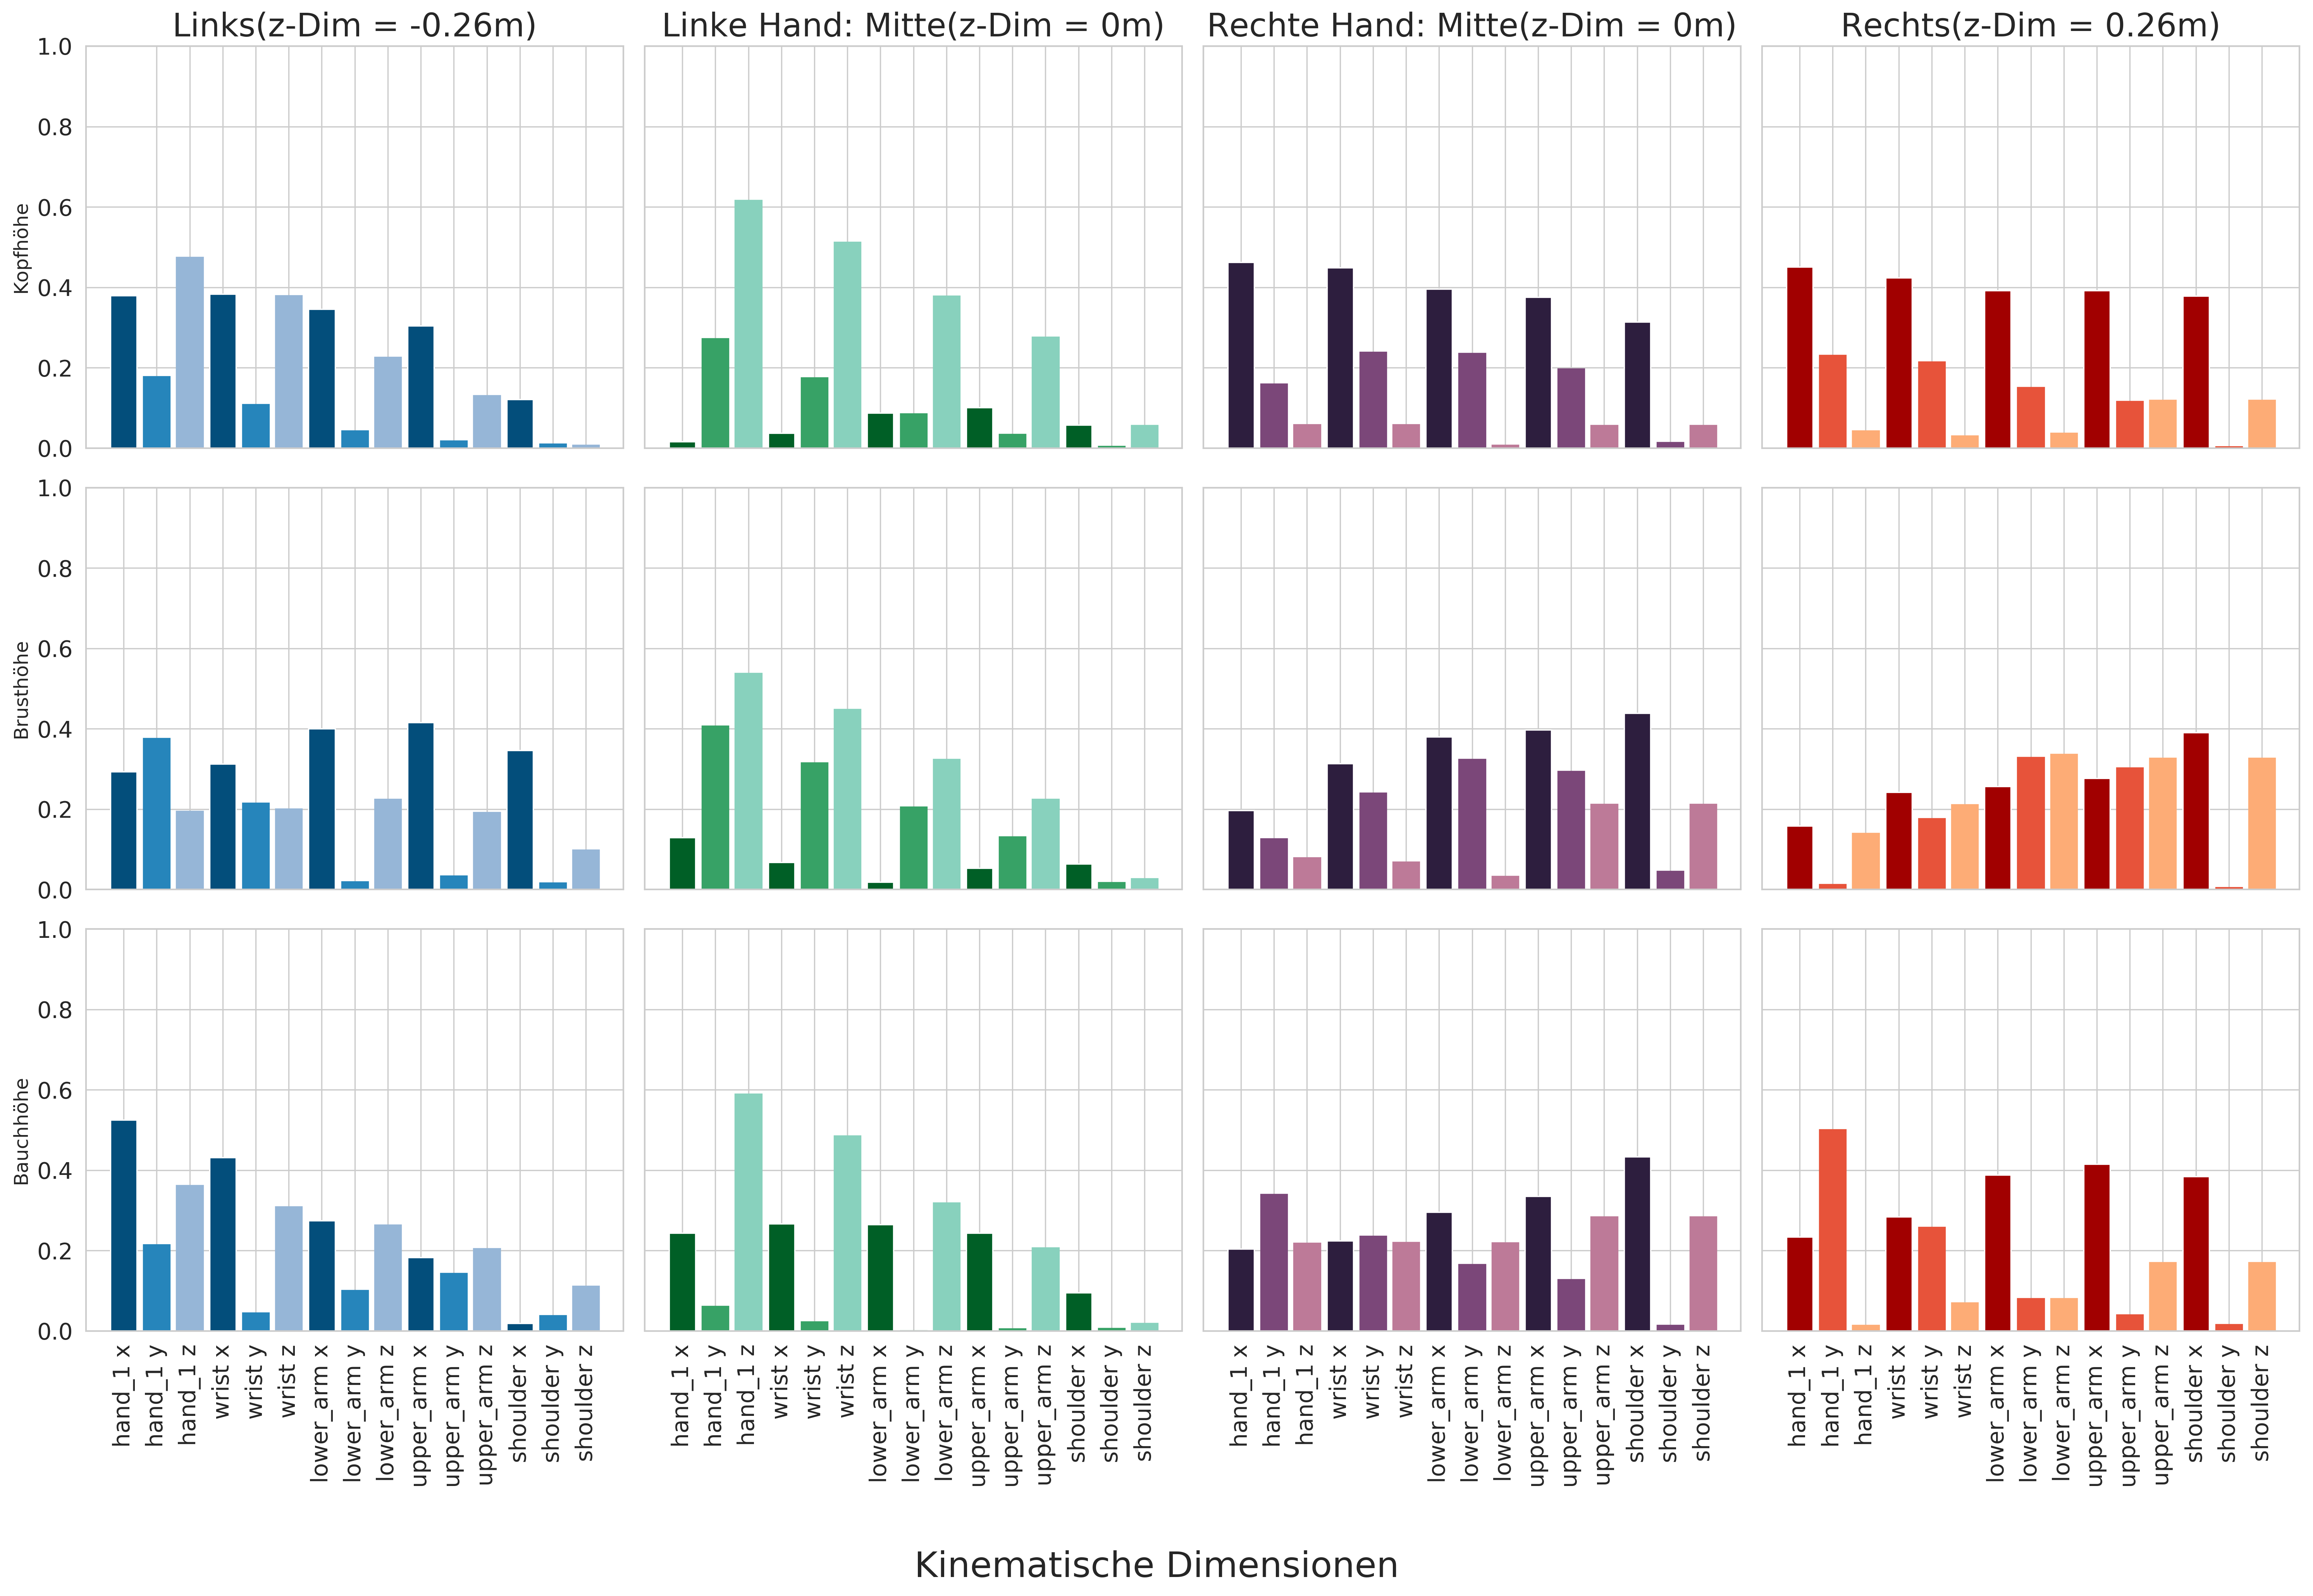

m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


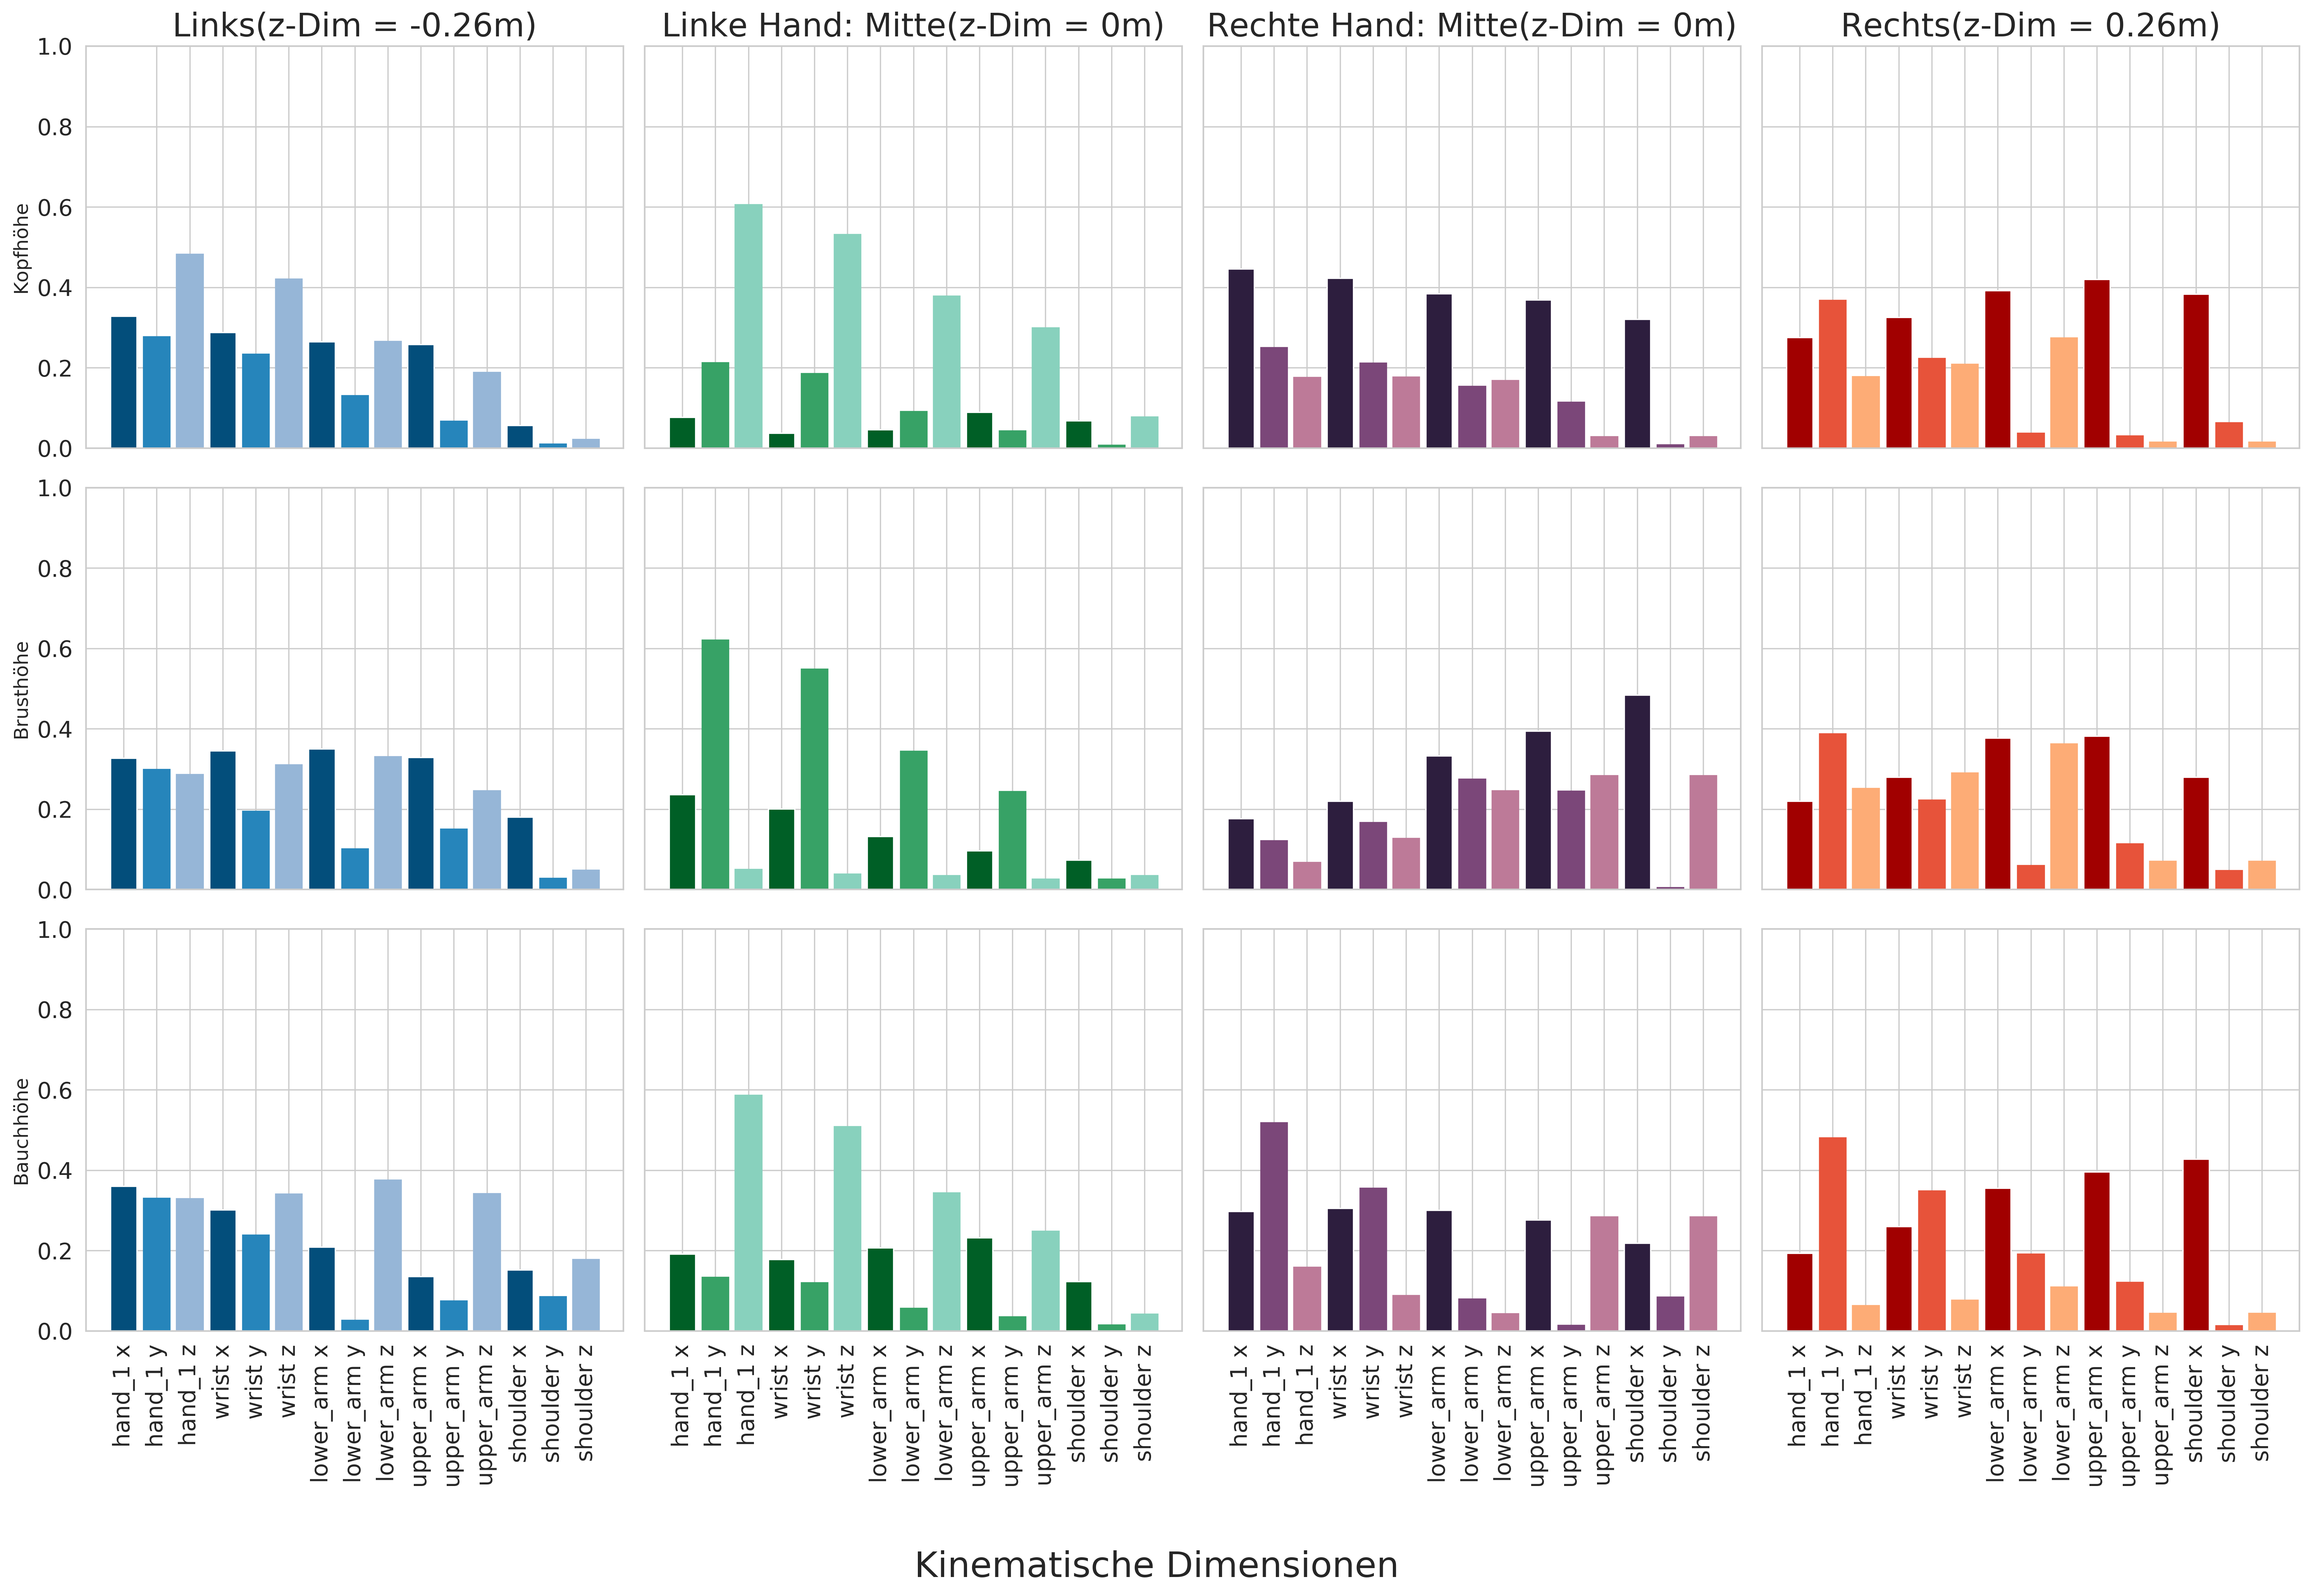

m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


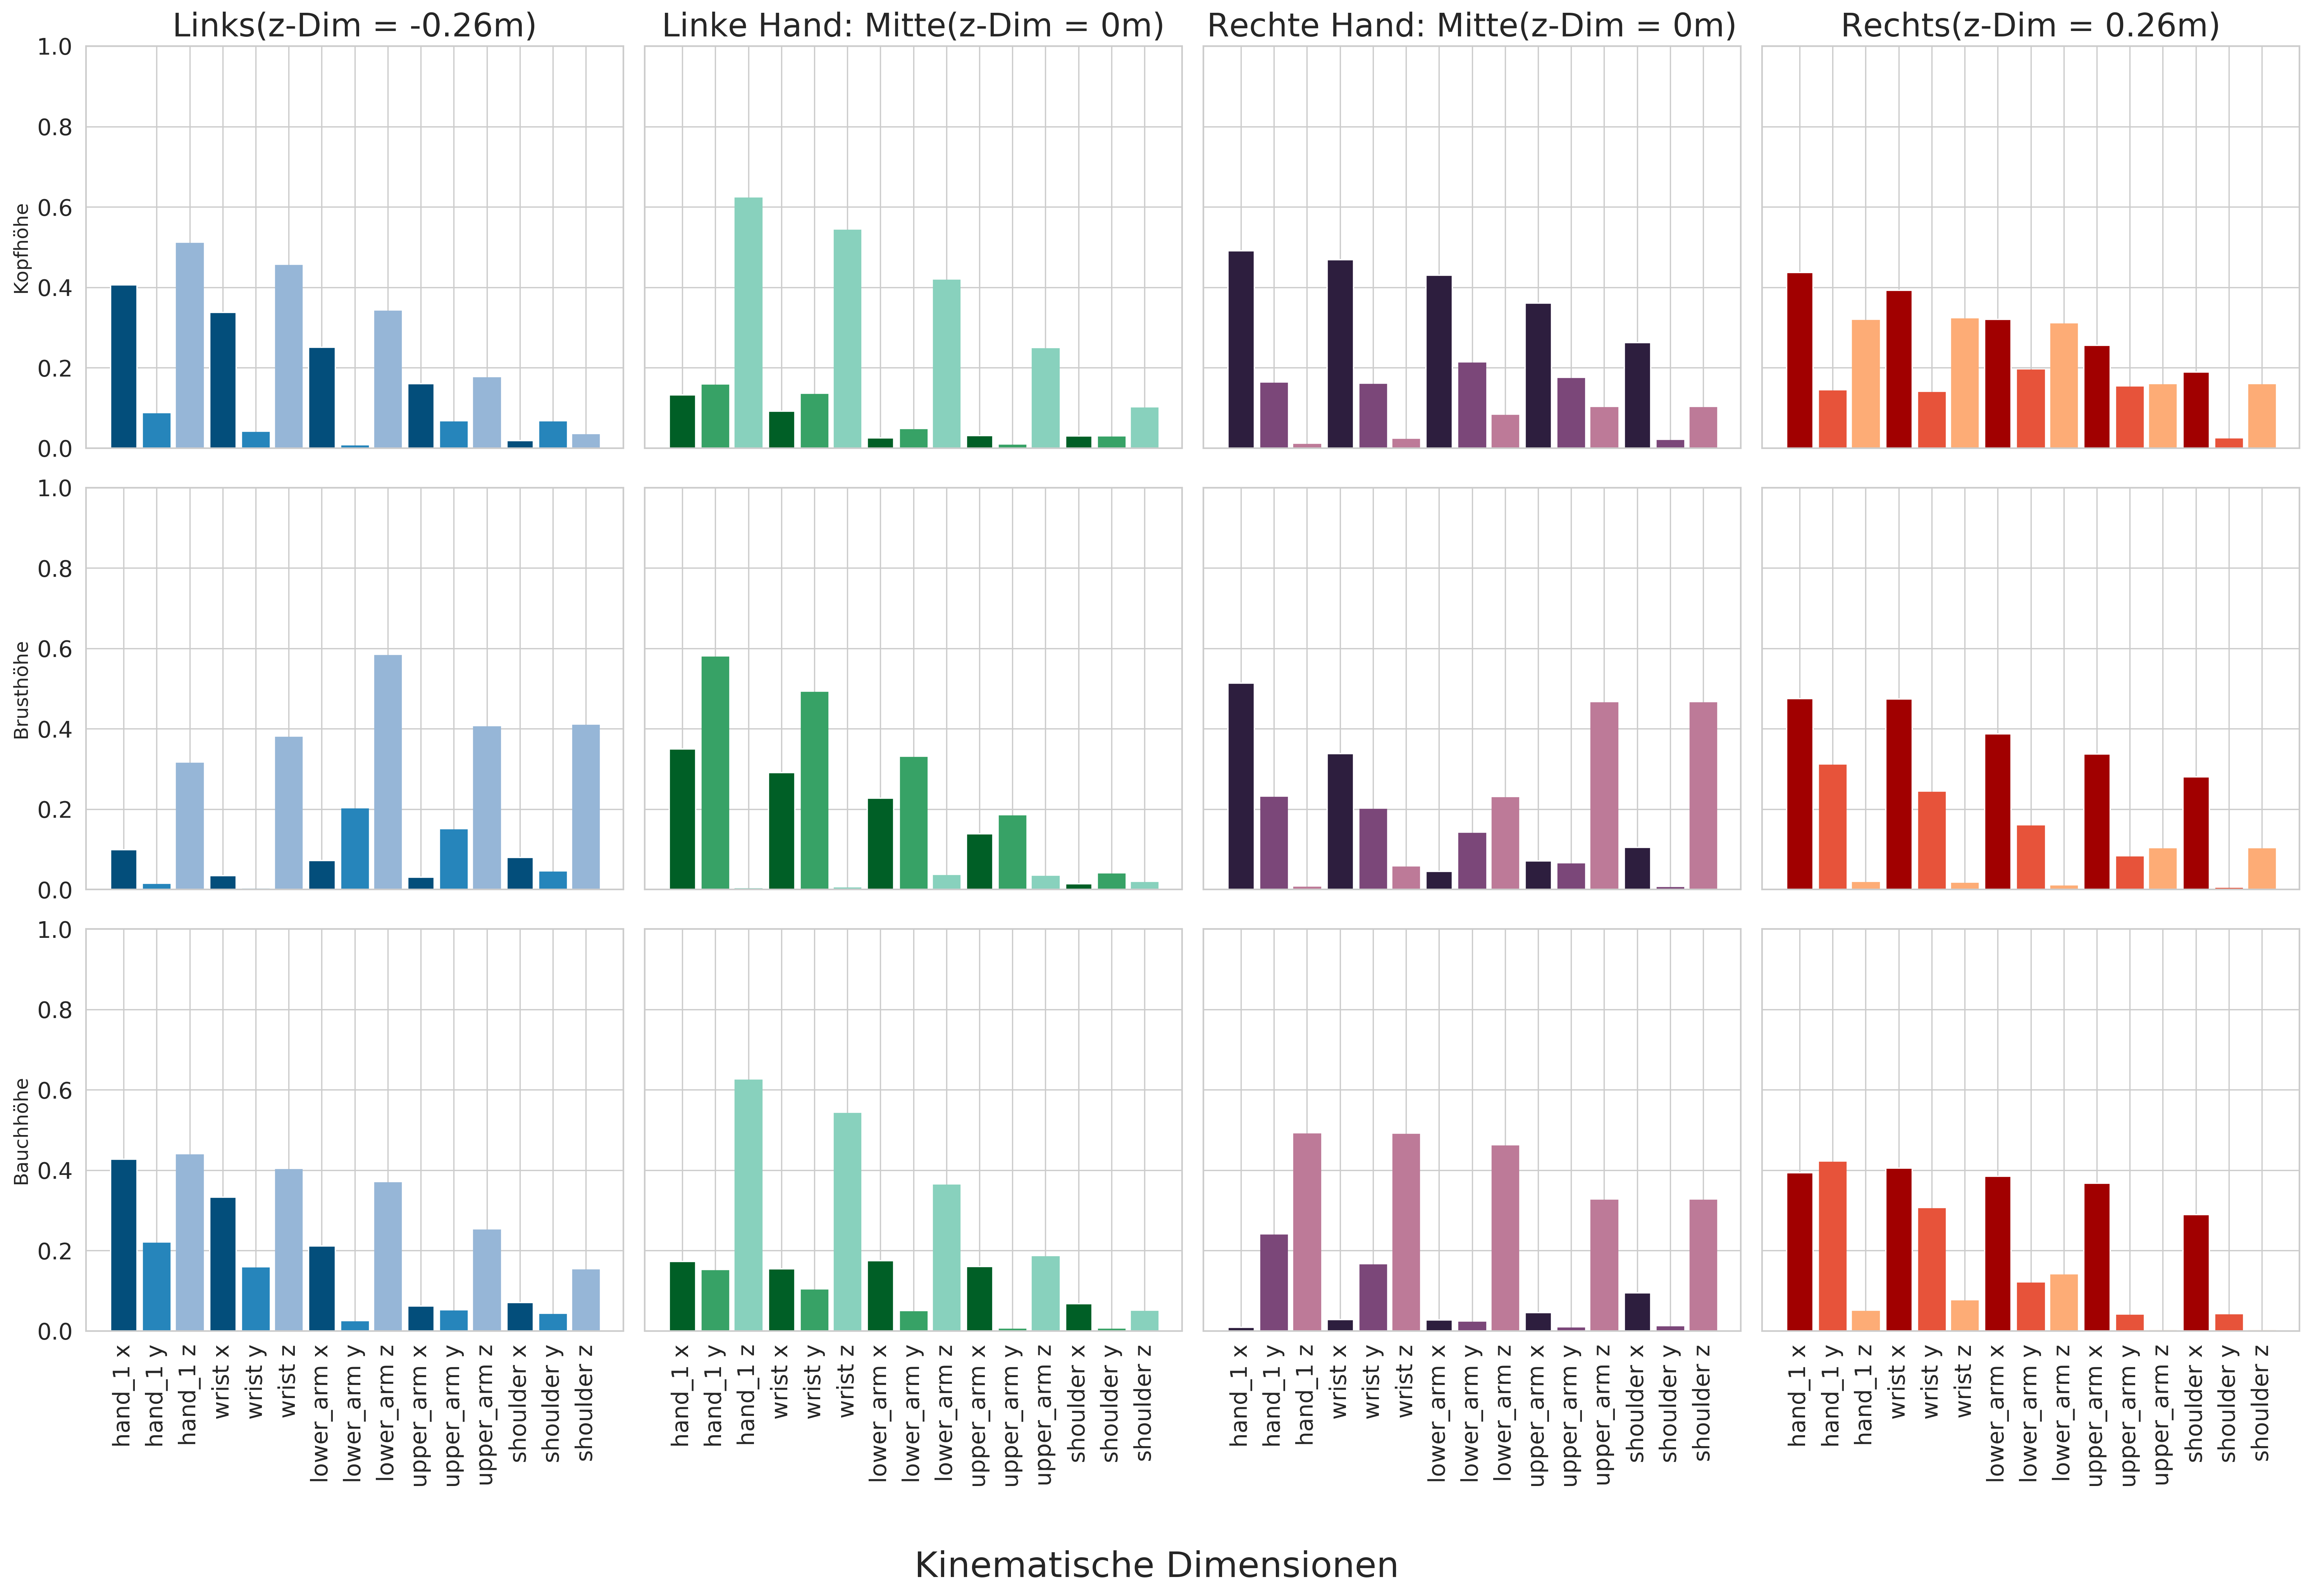

m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


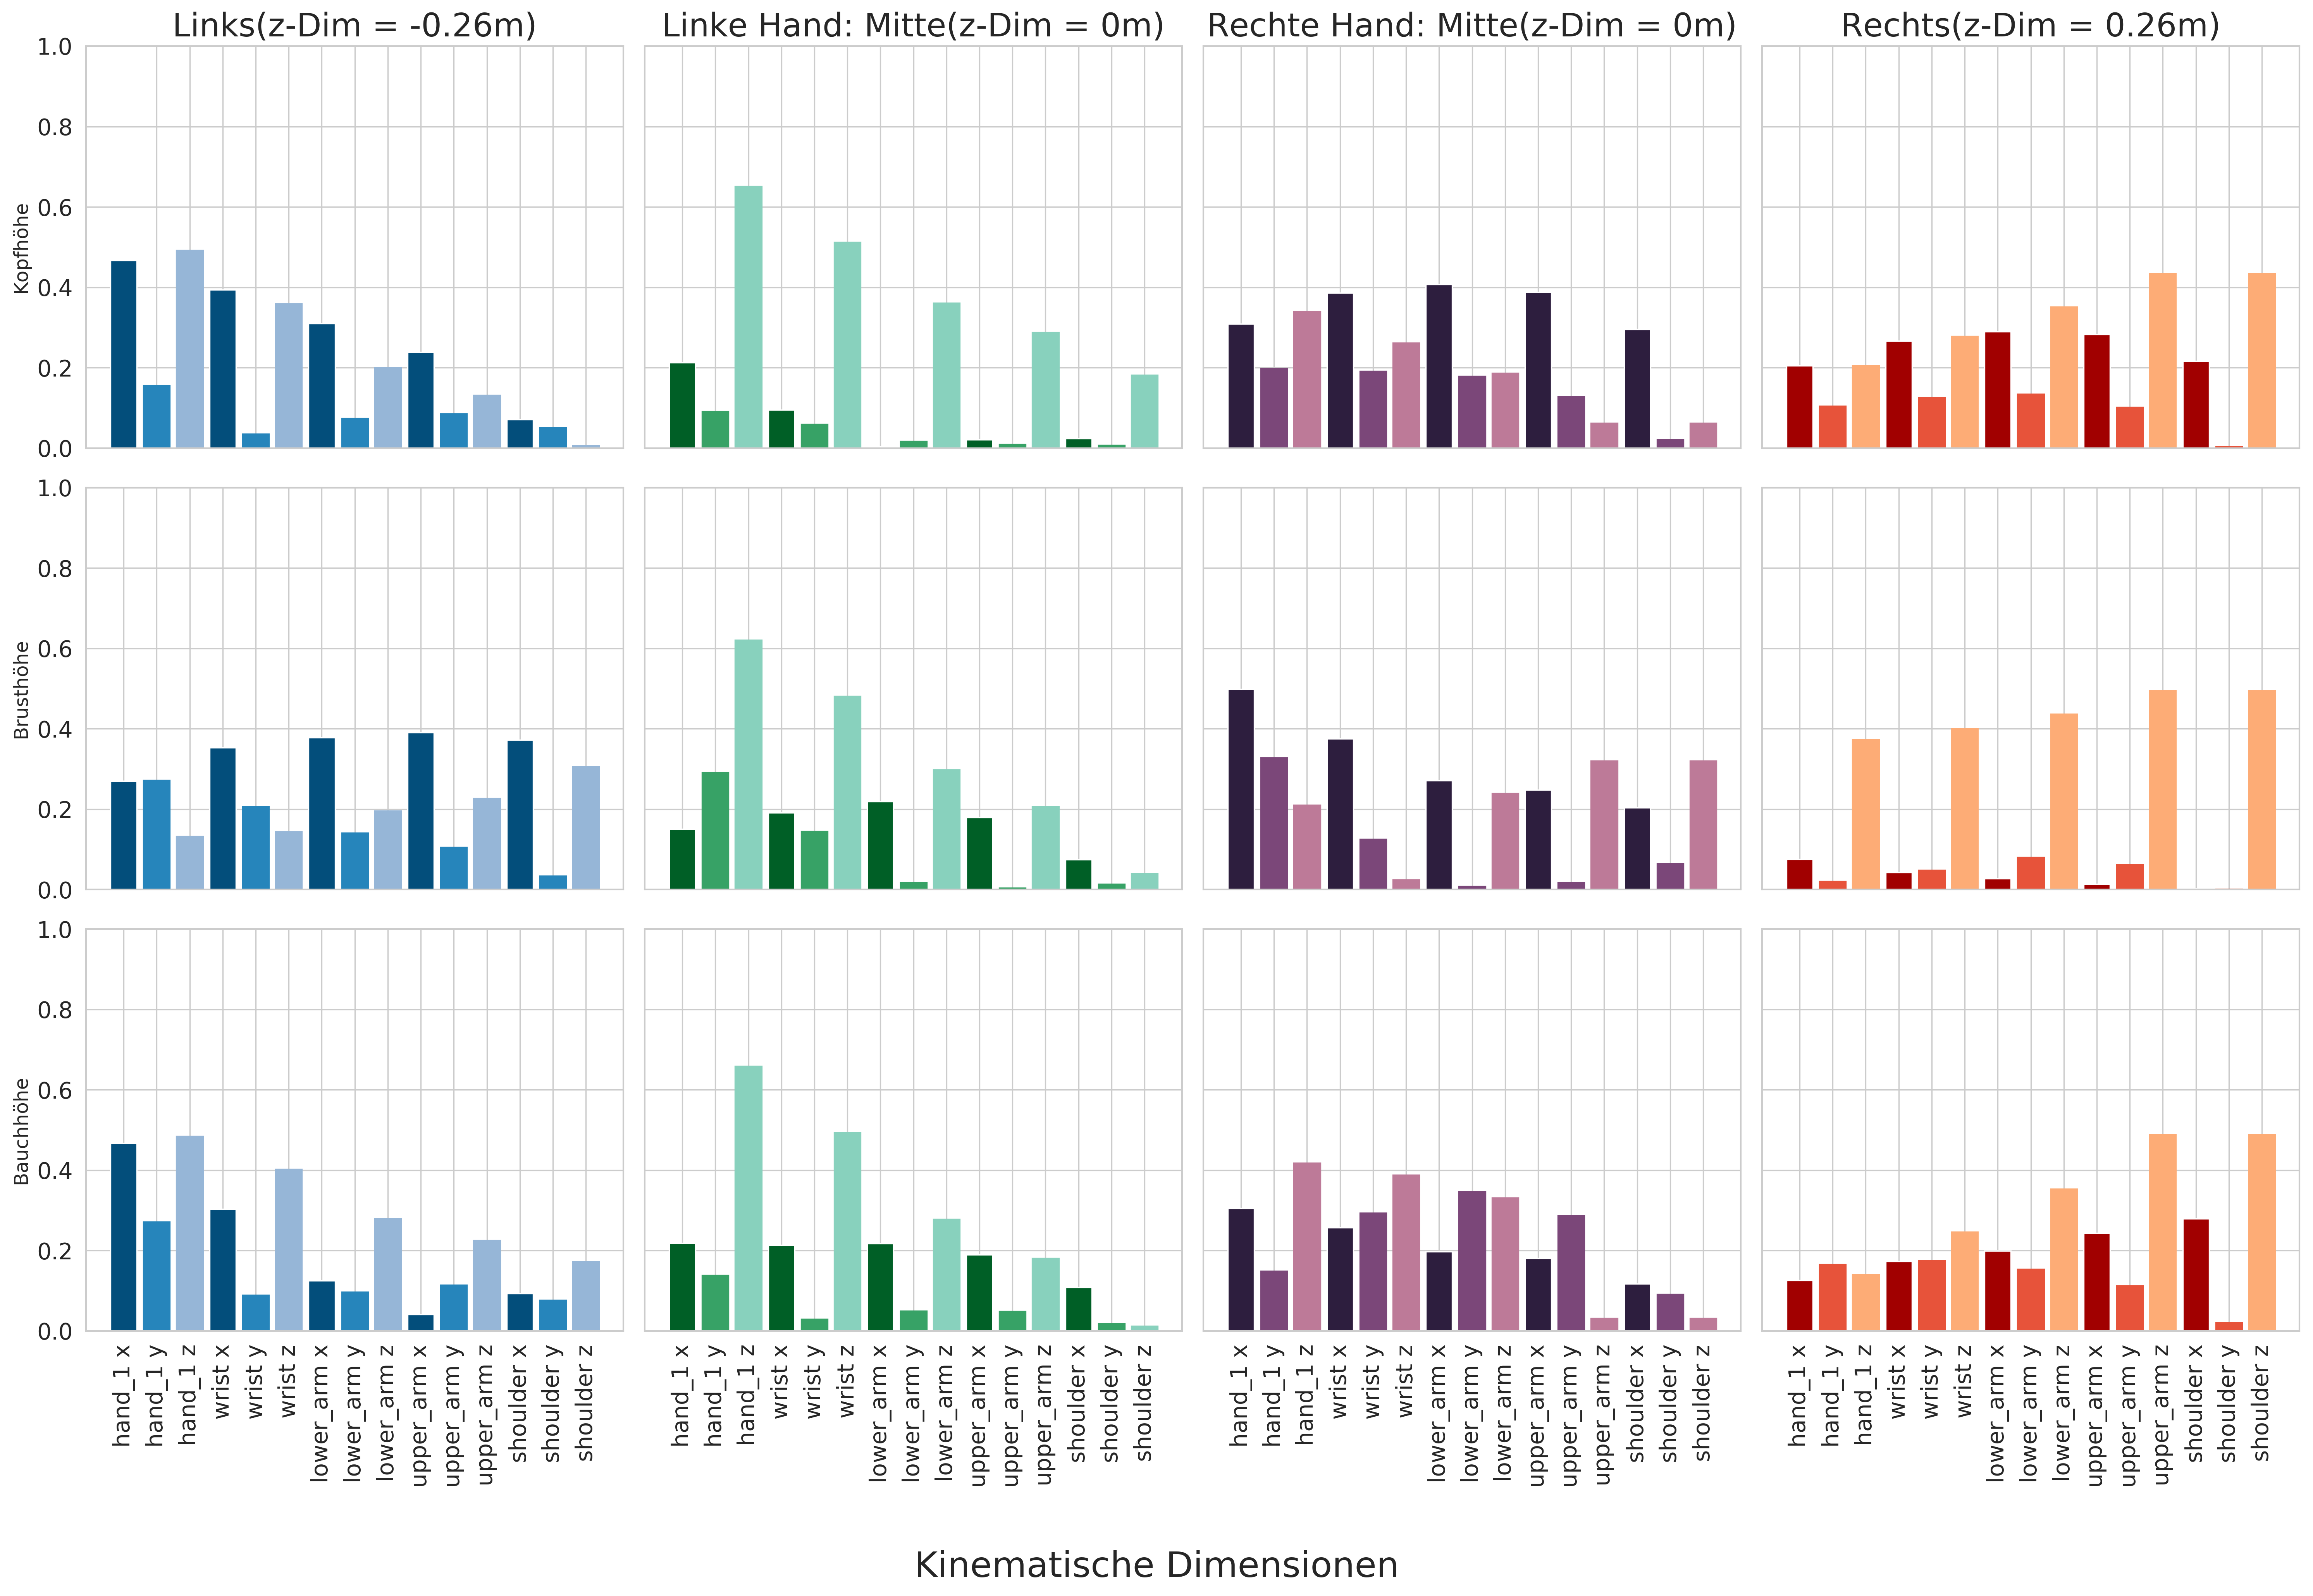

m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


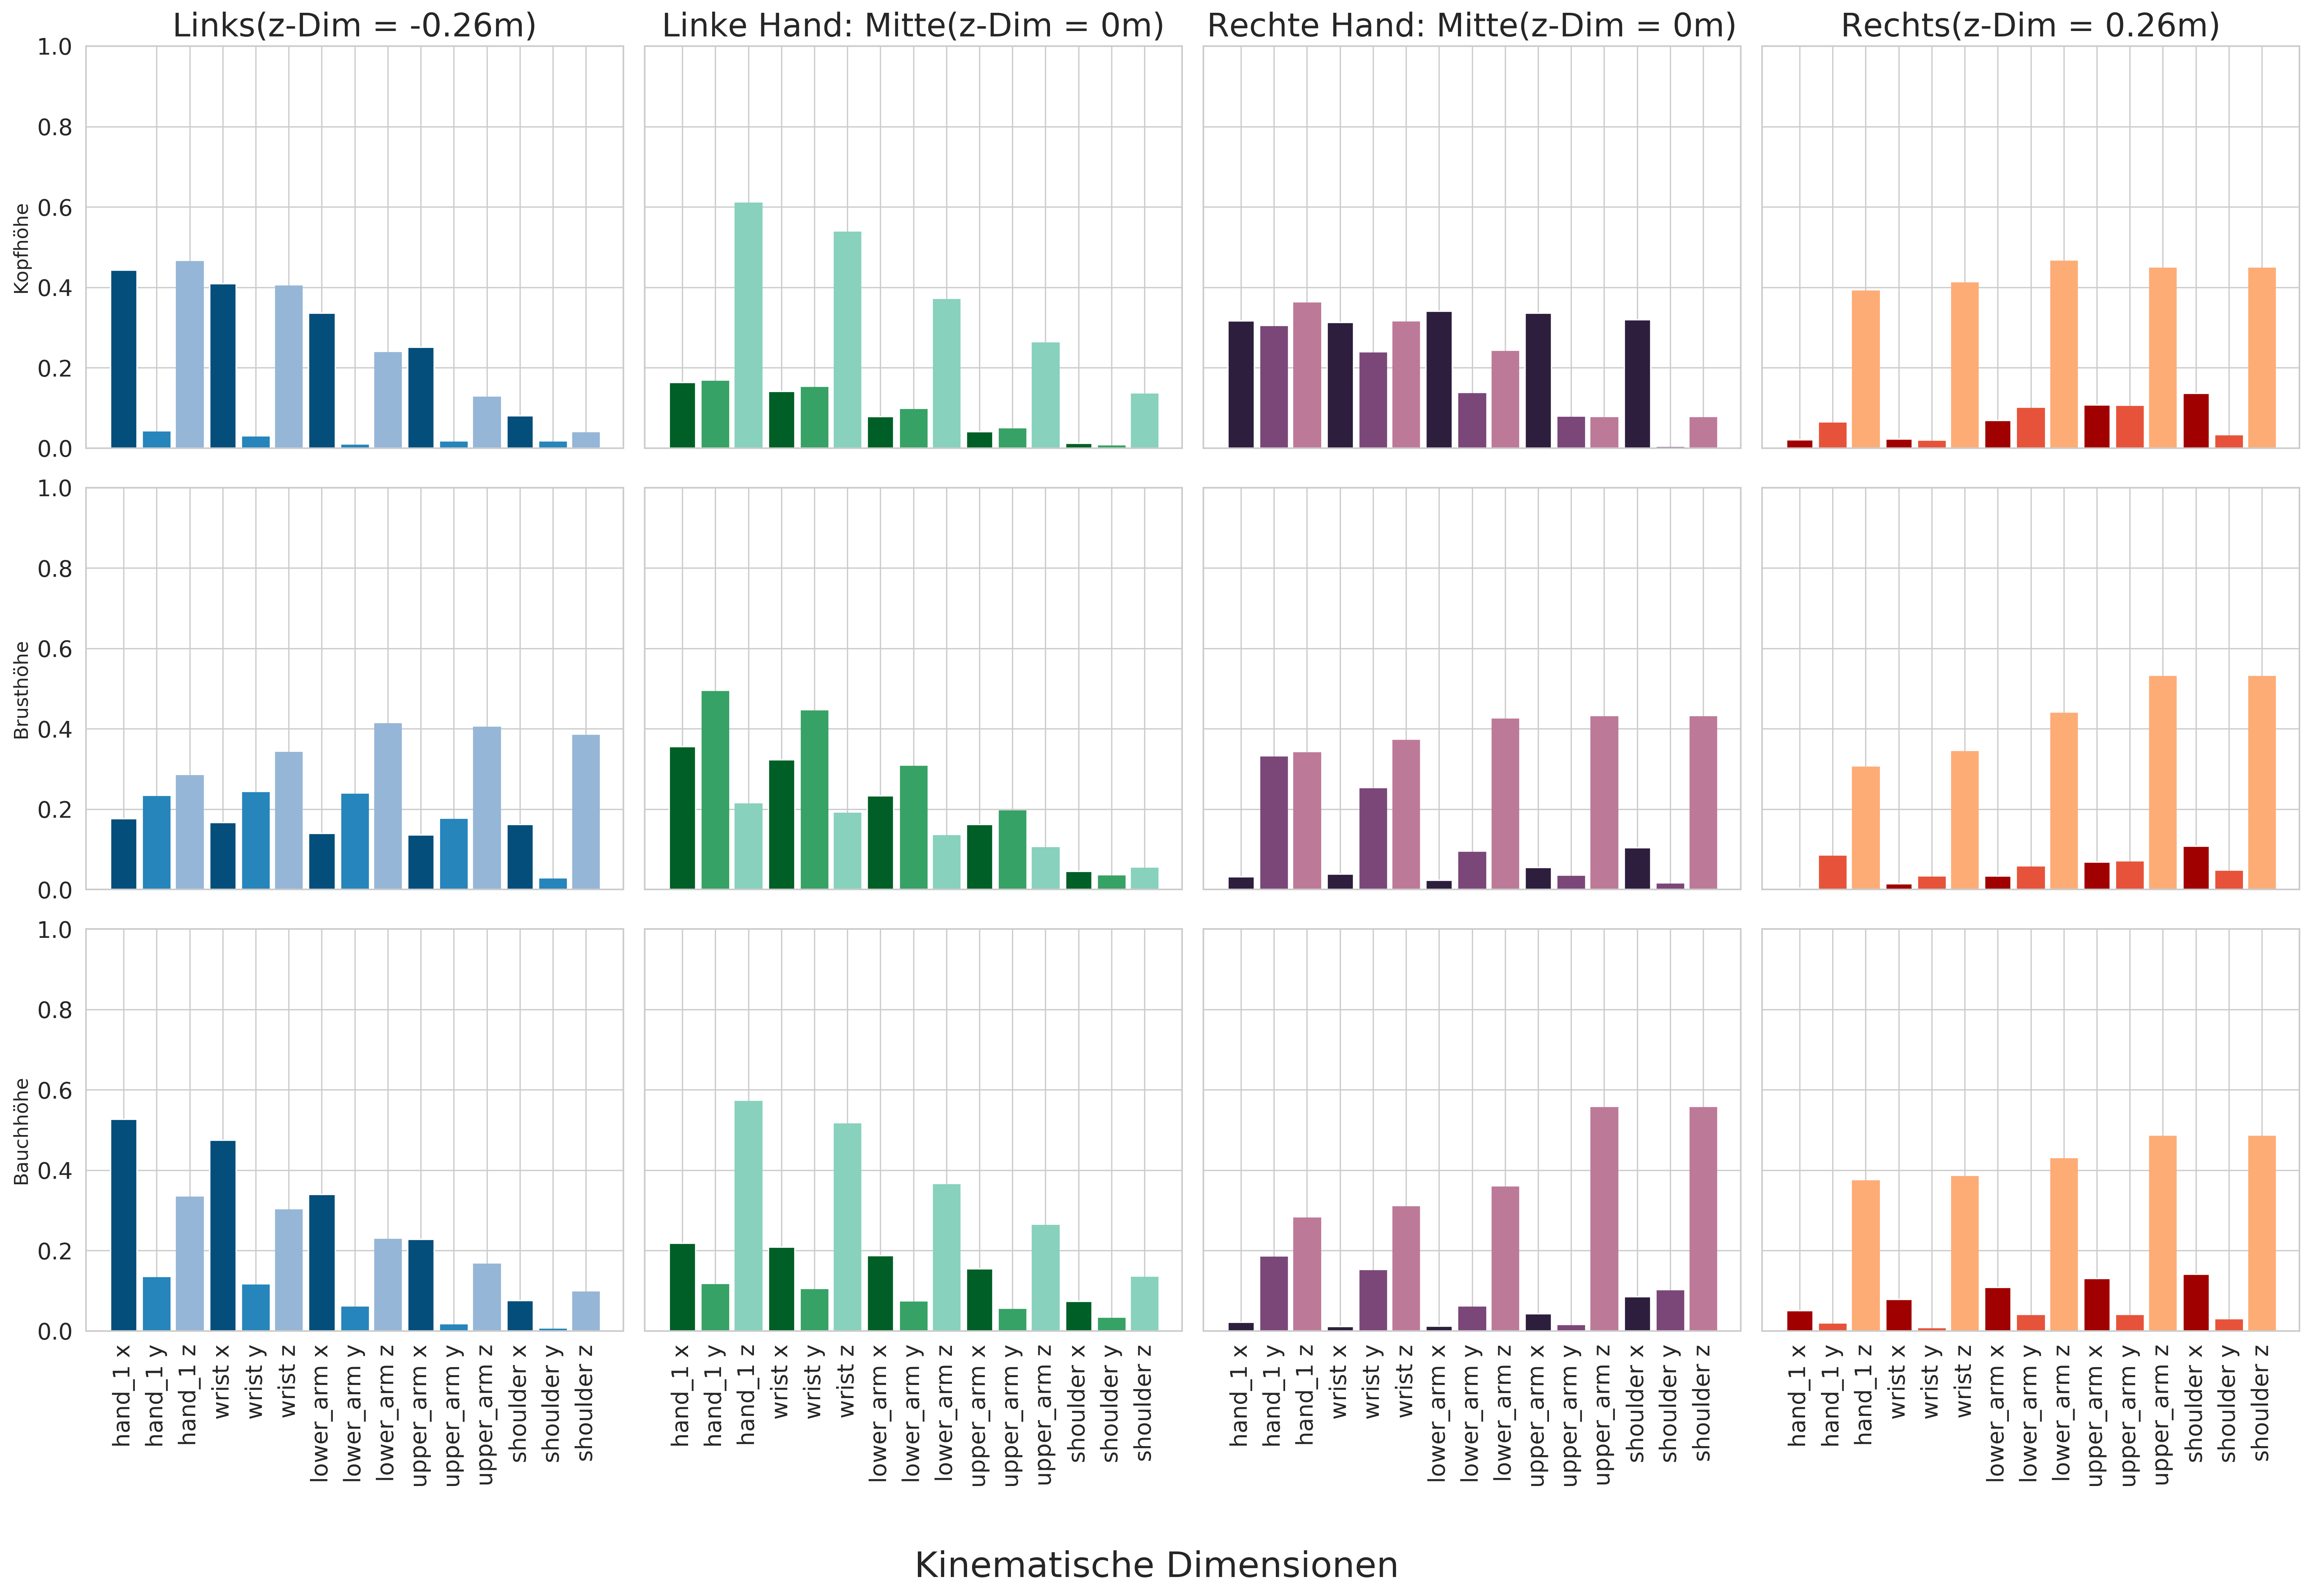

vts
me
vafs


/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


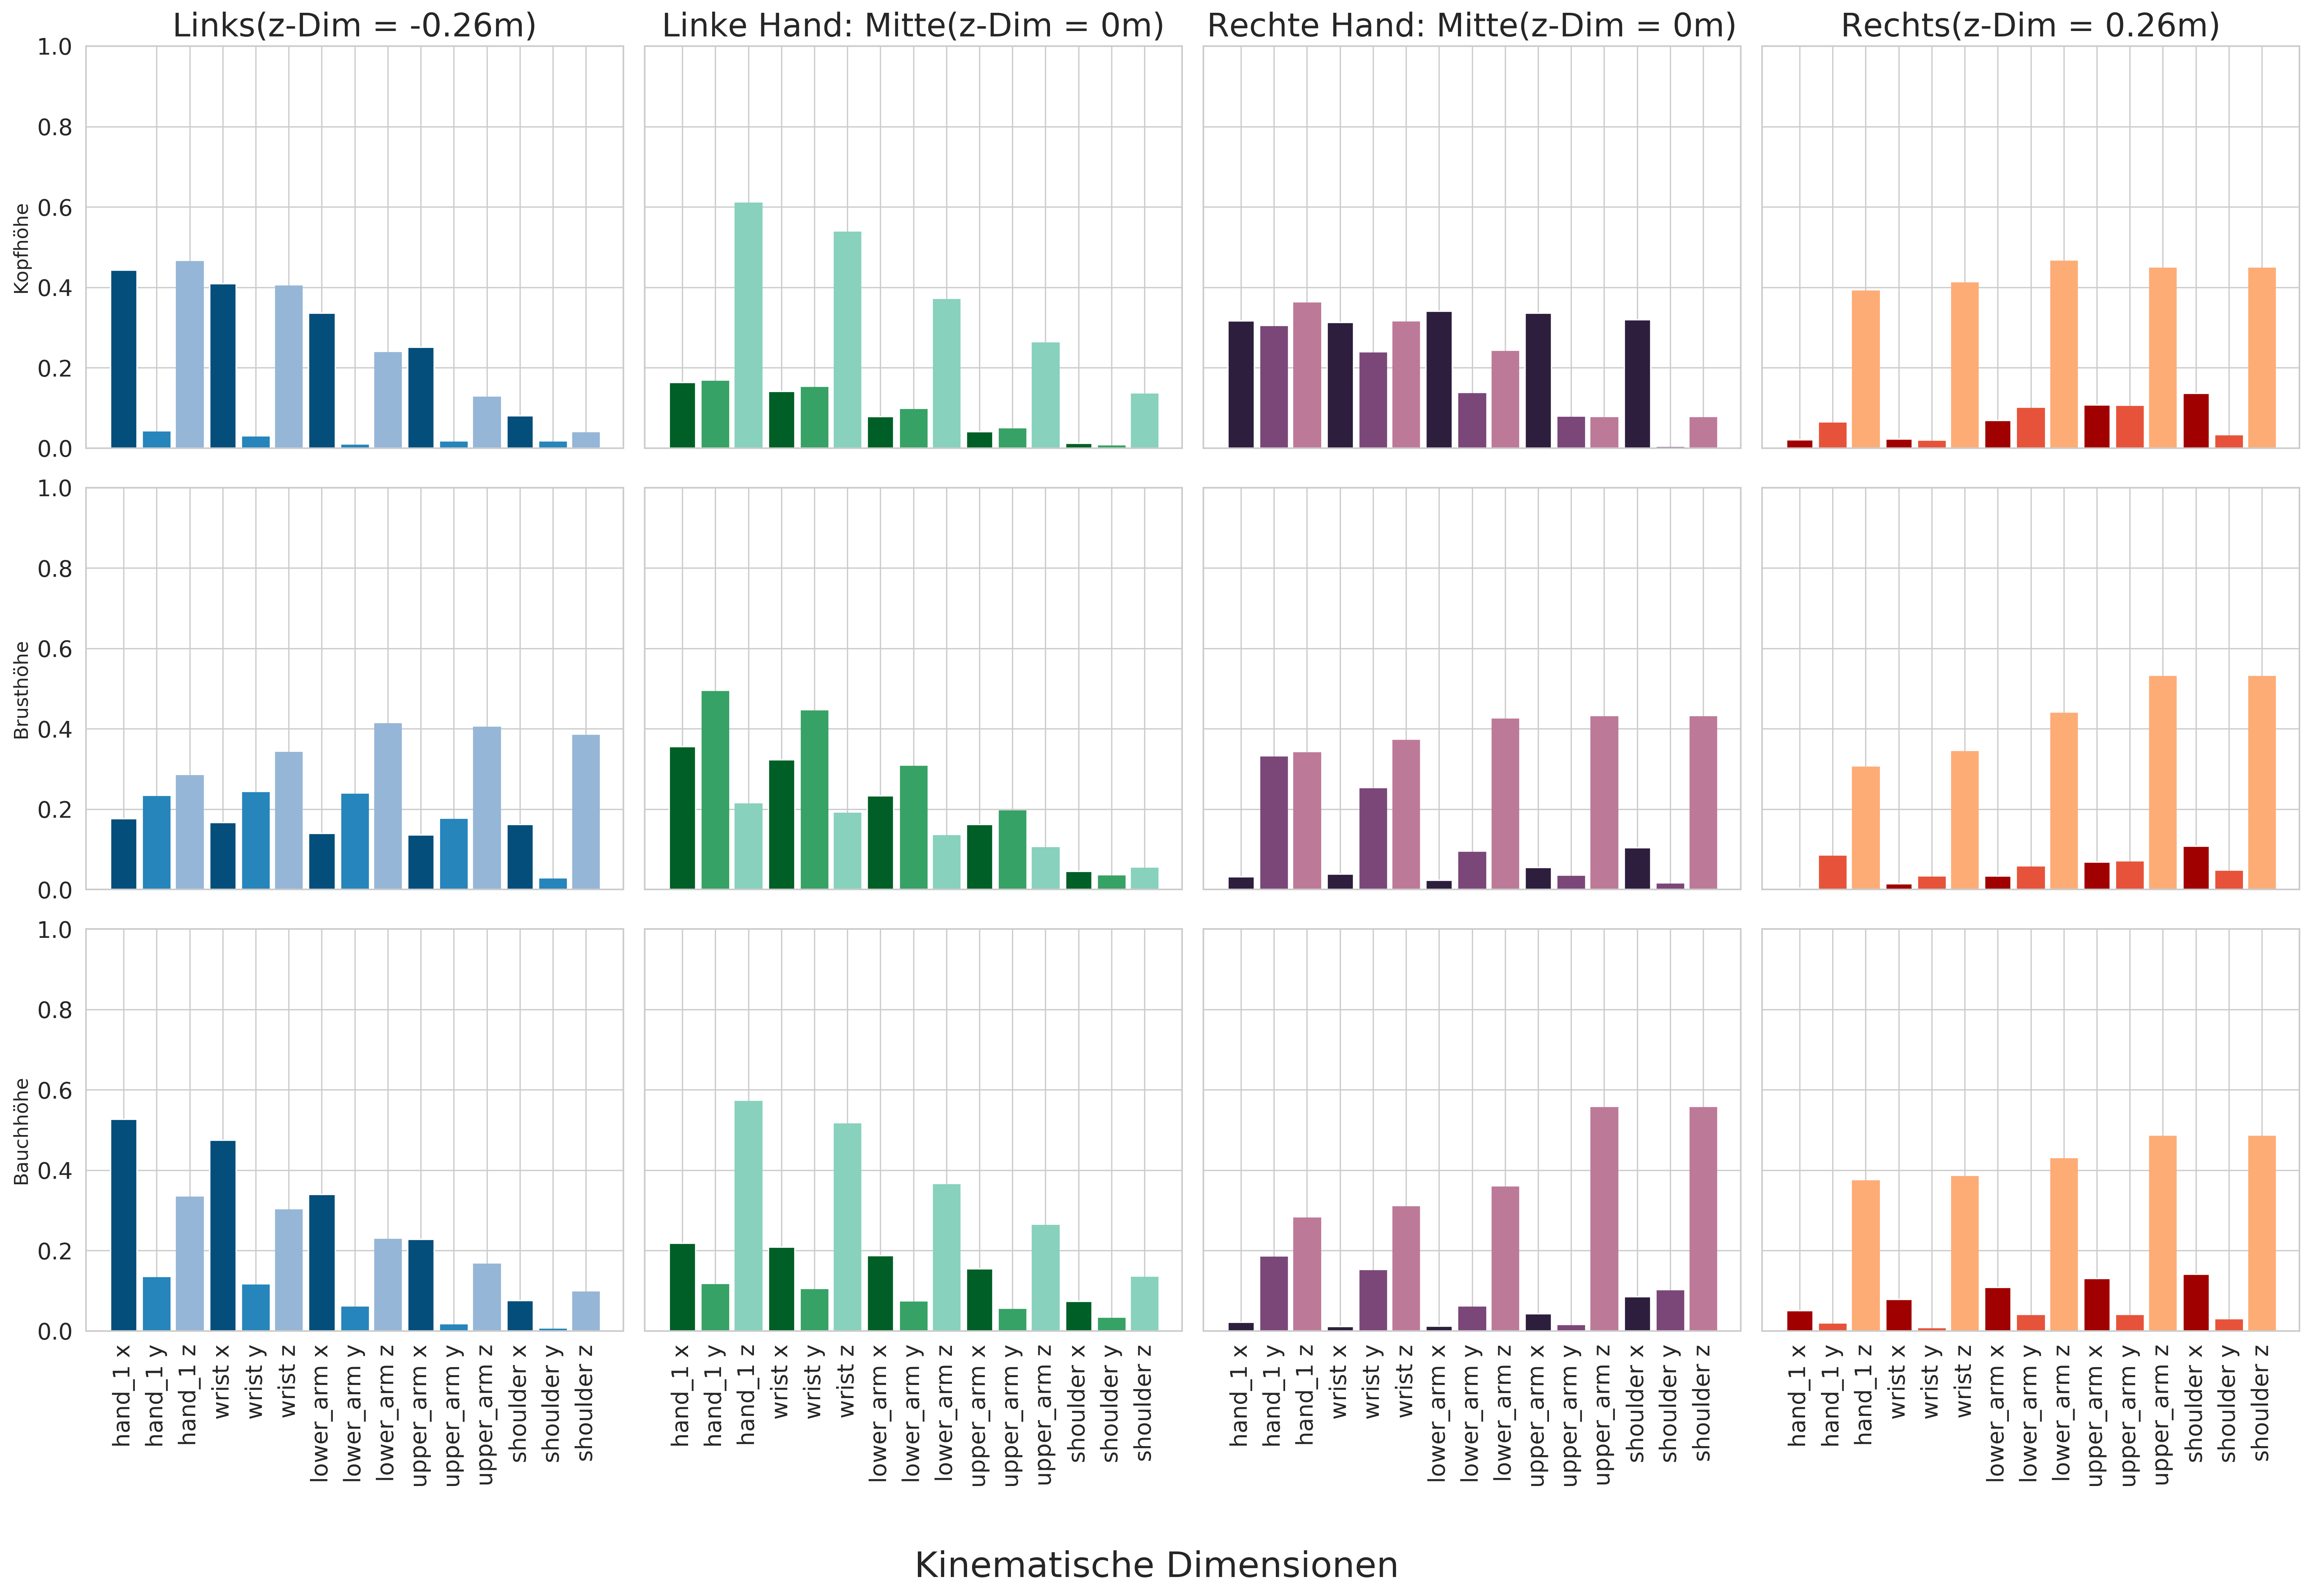

m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


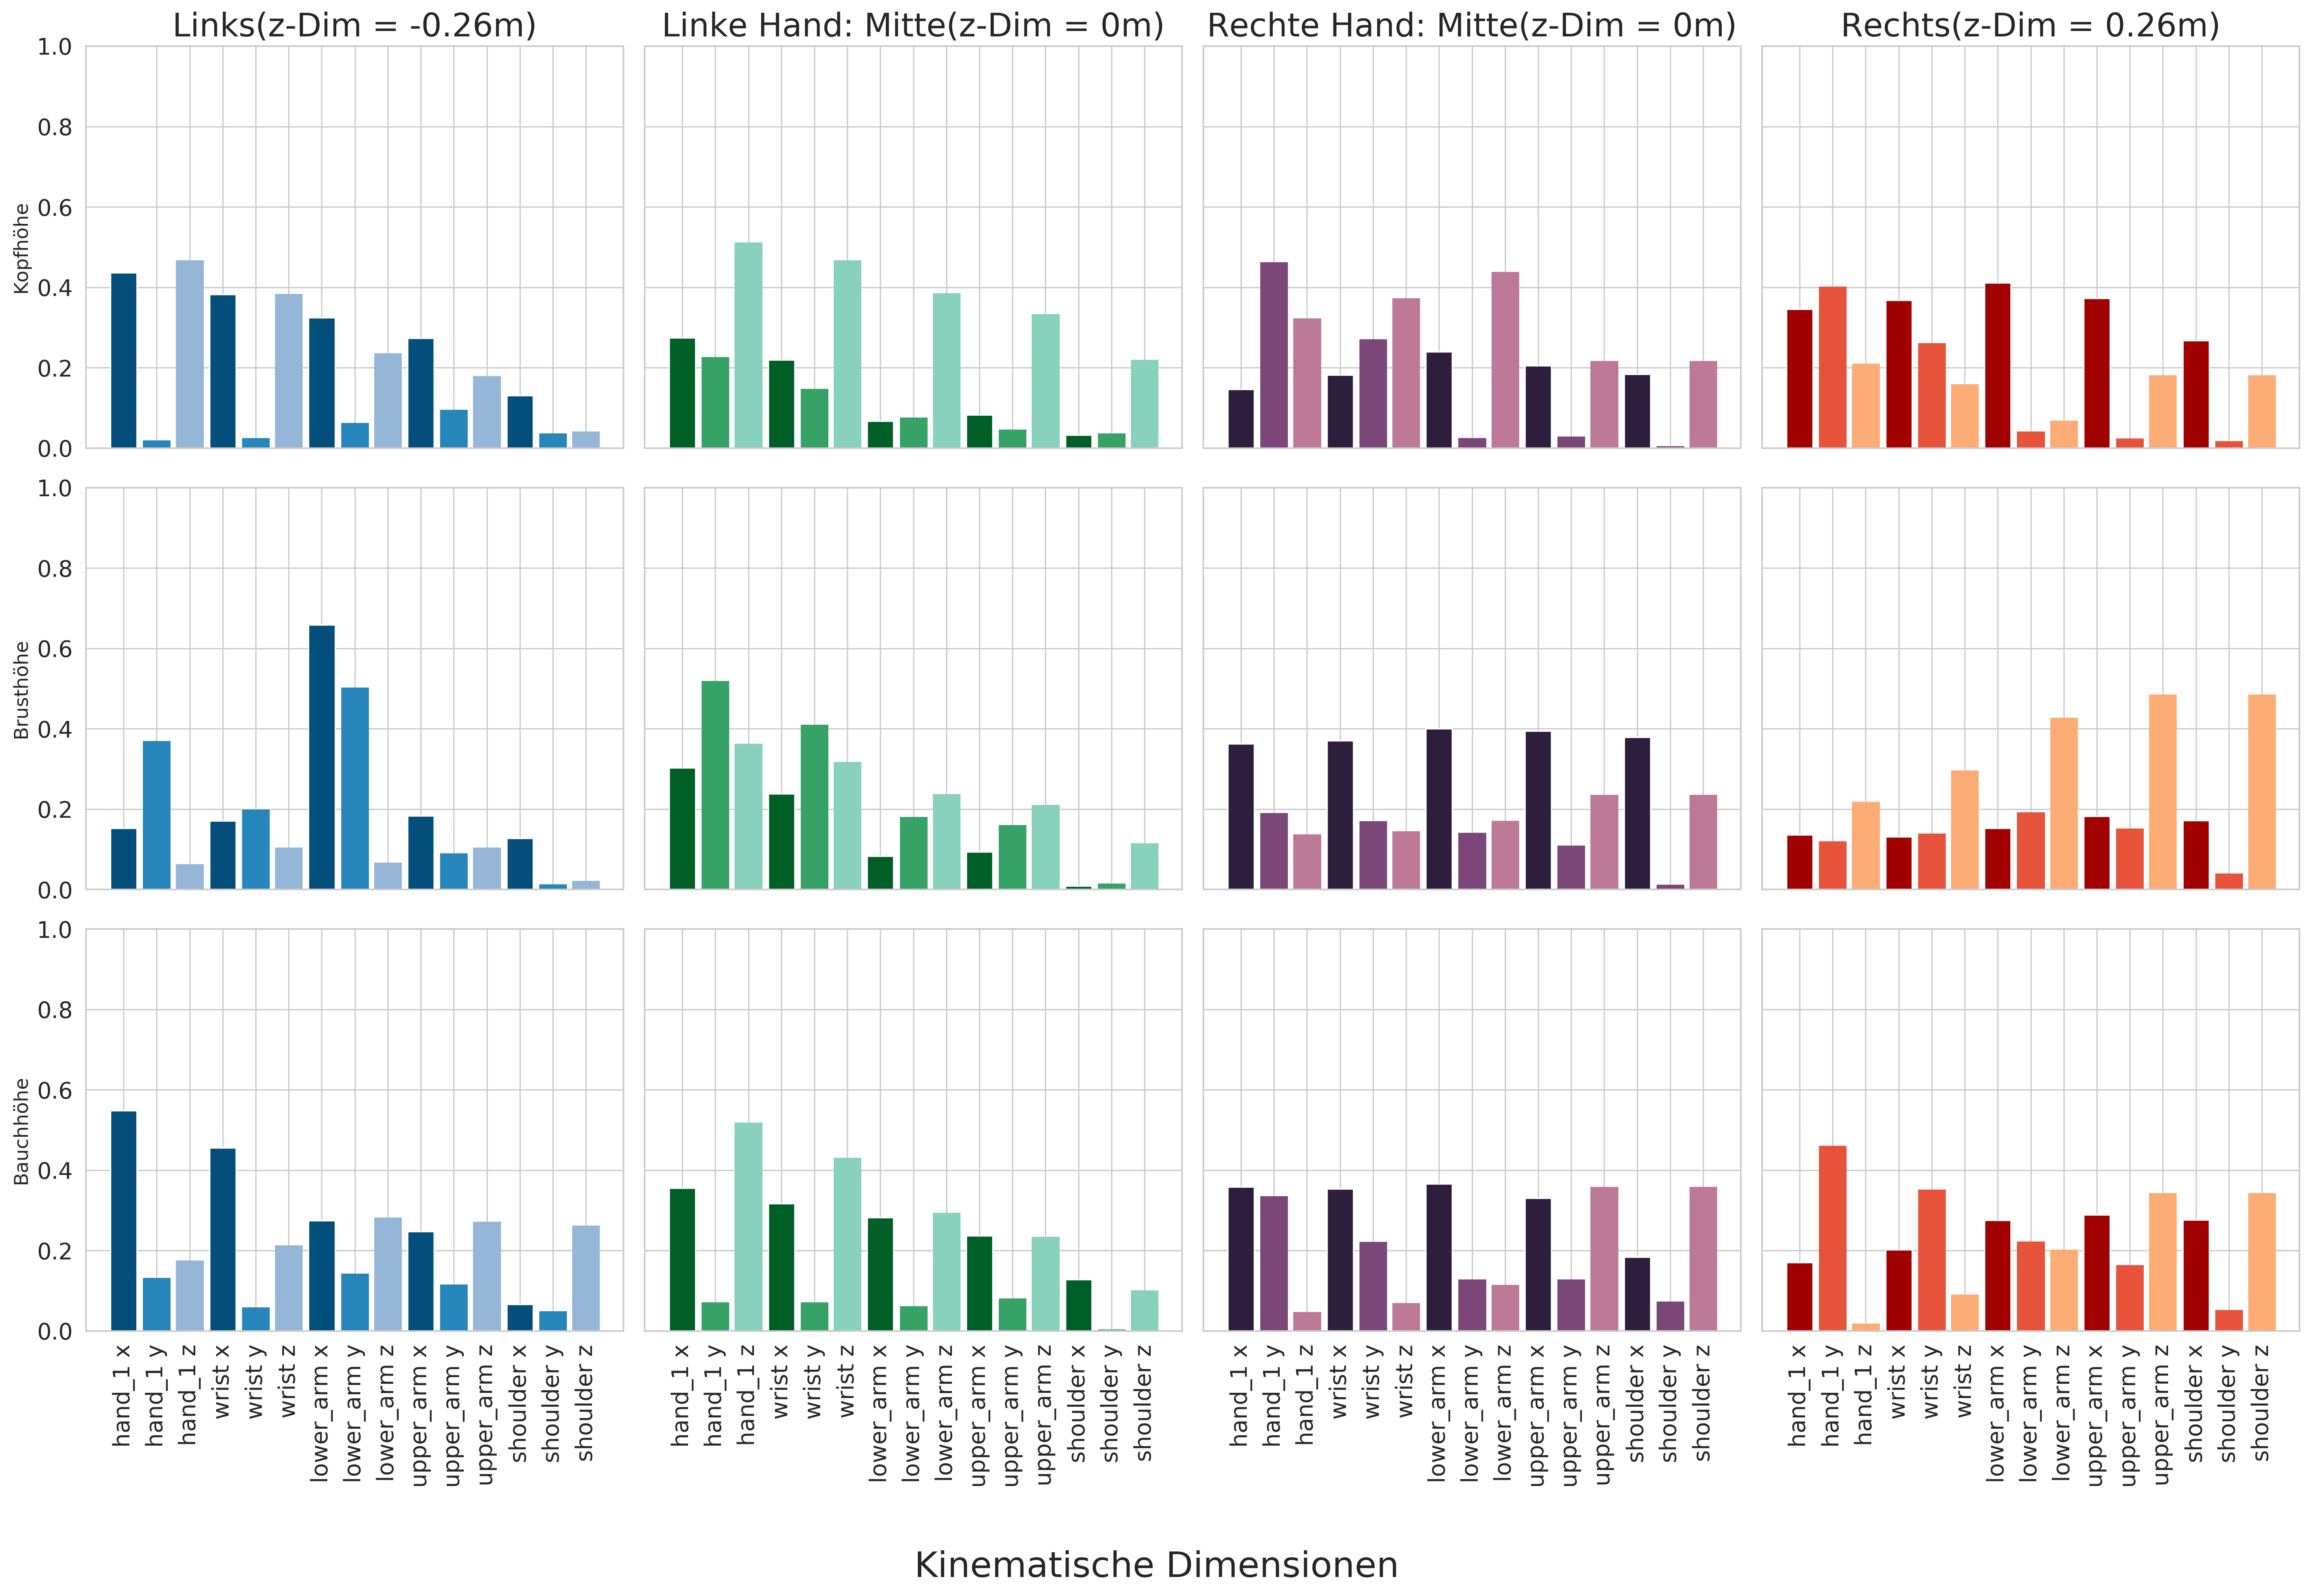

m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


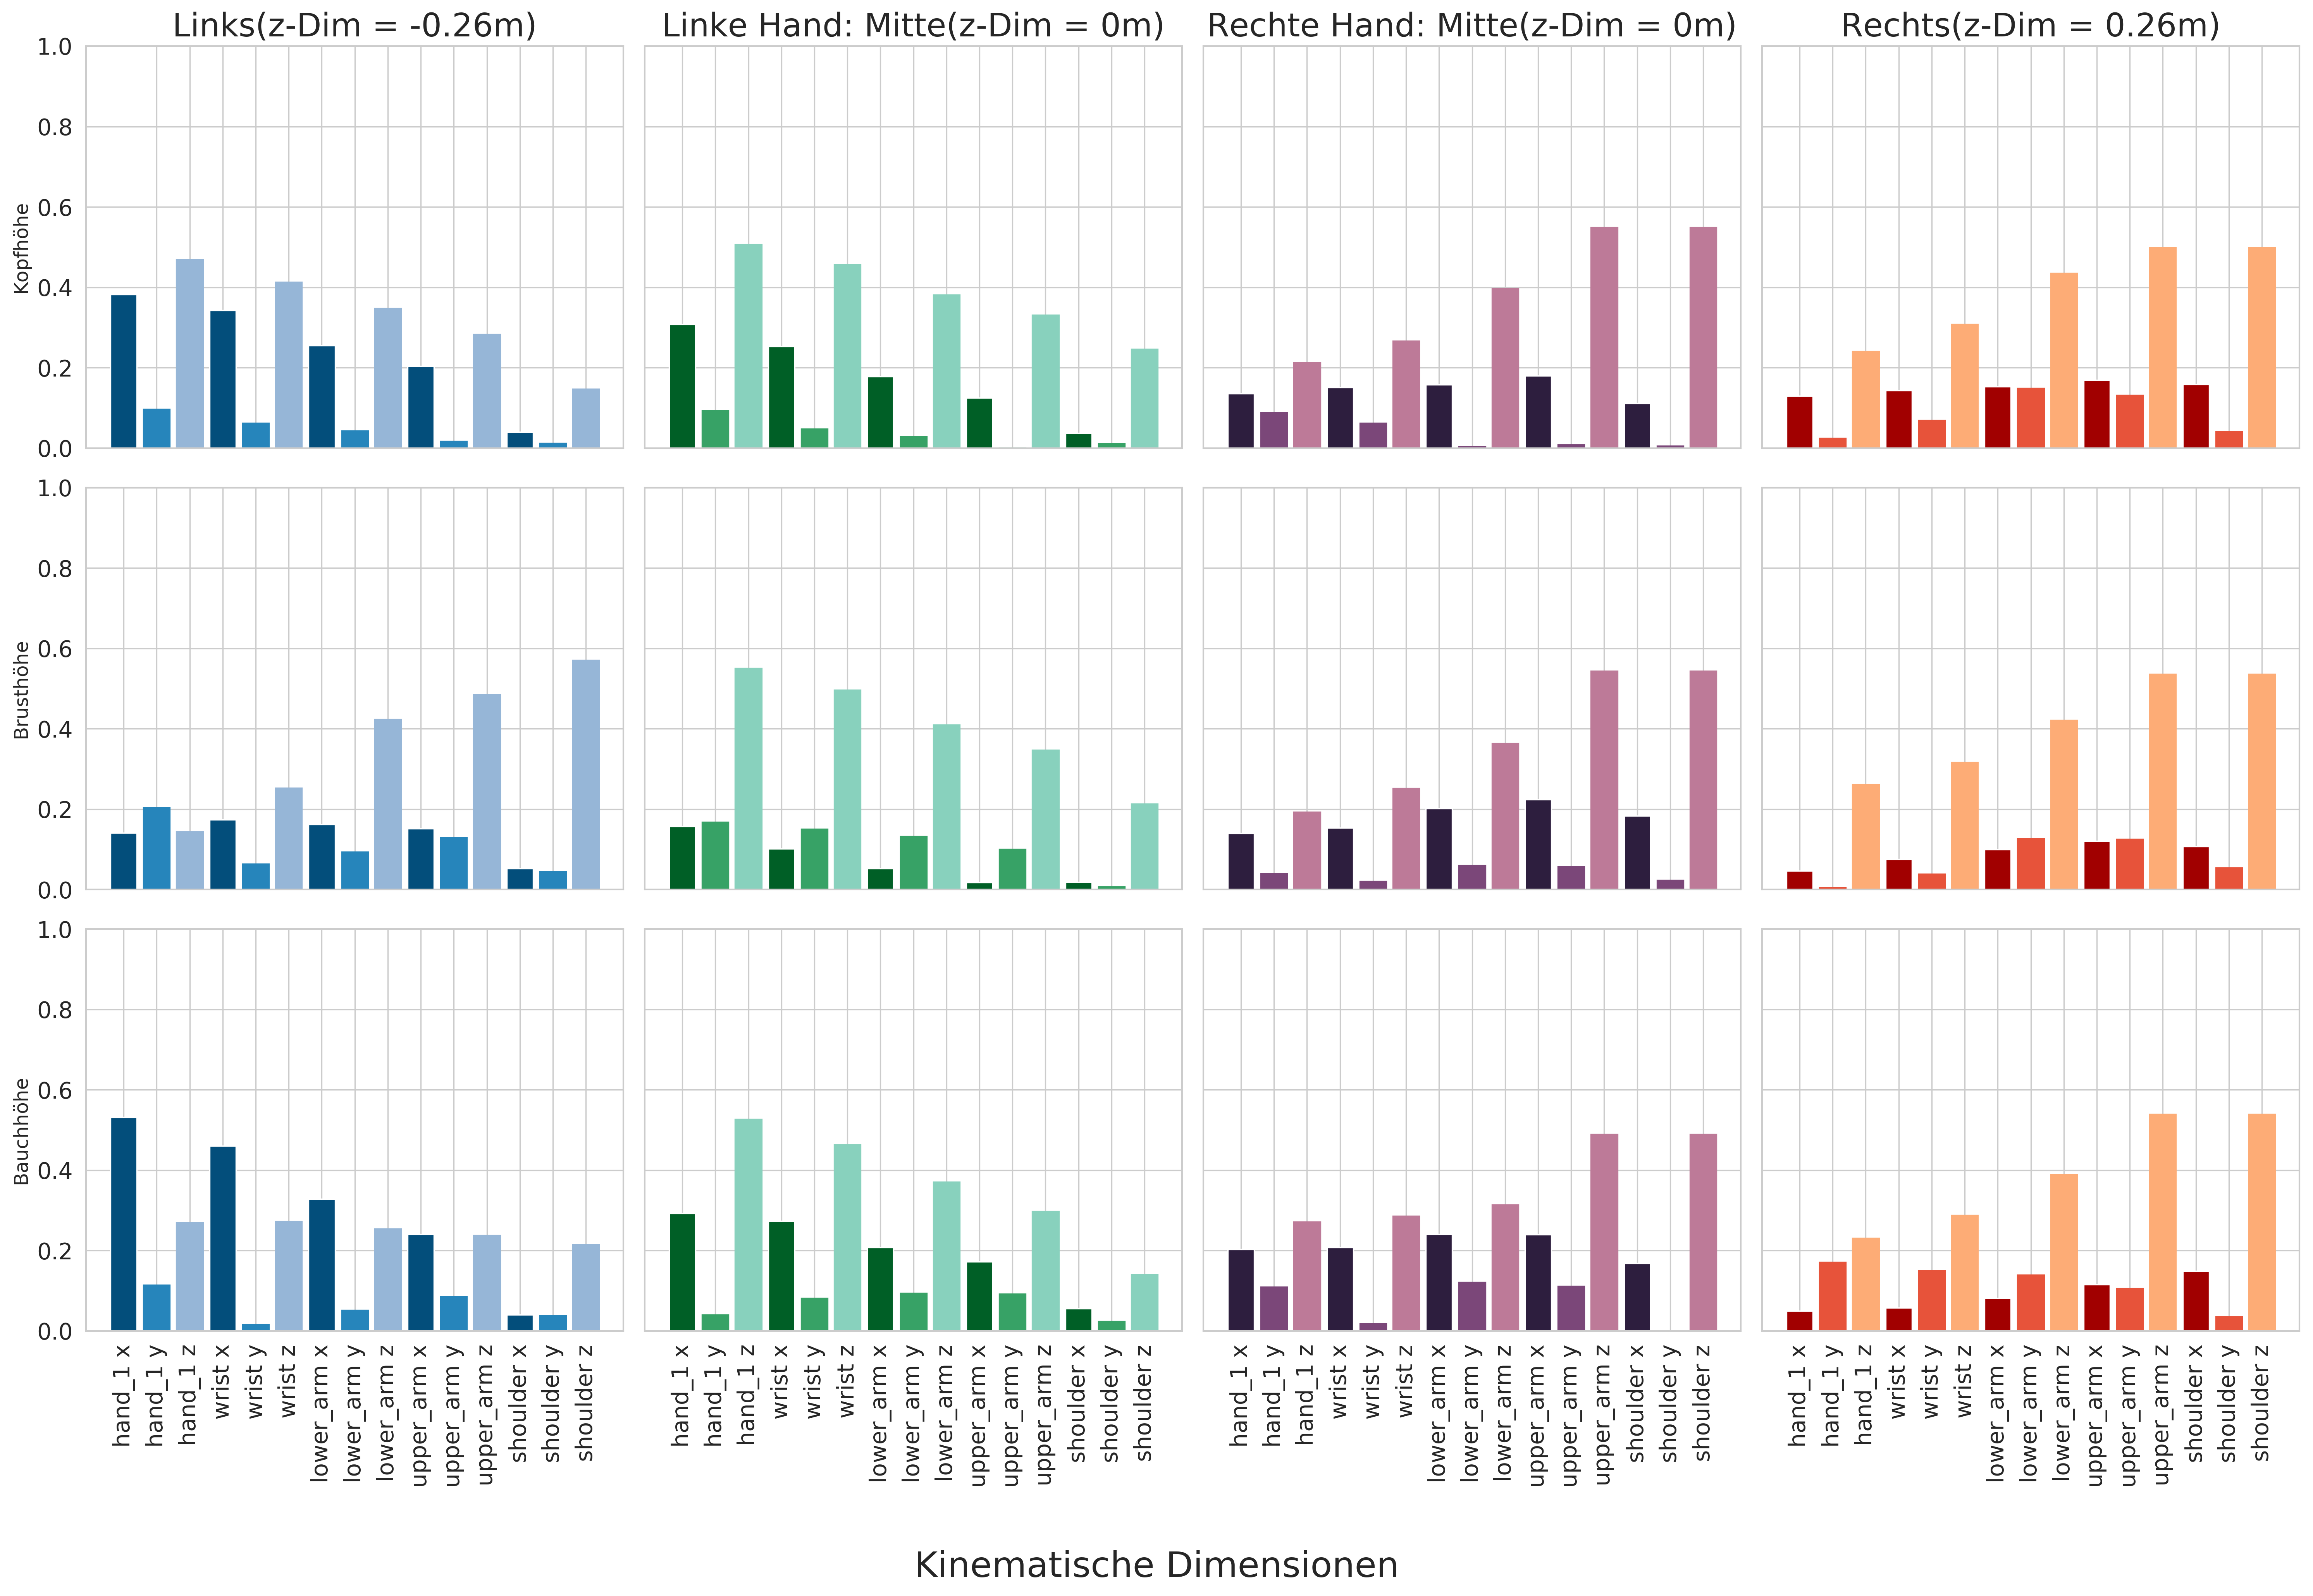

m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


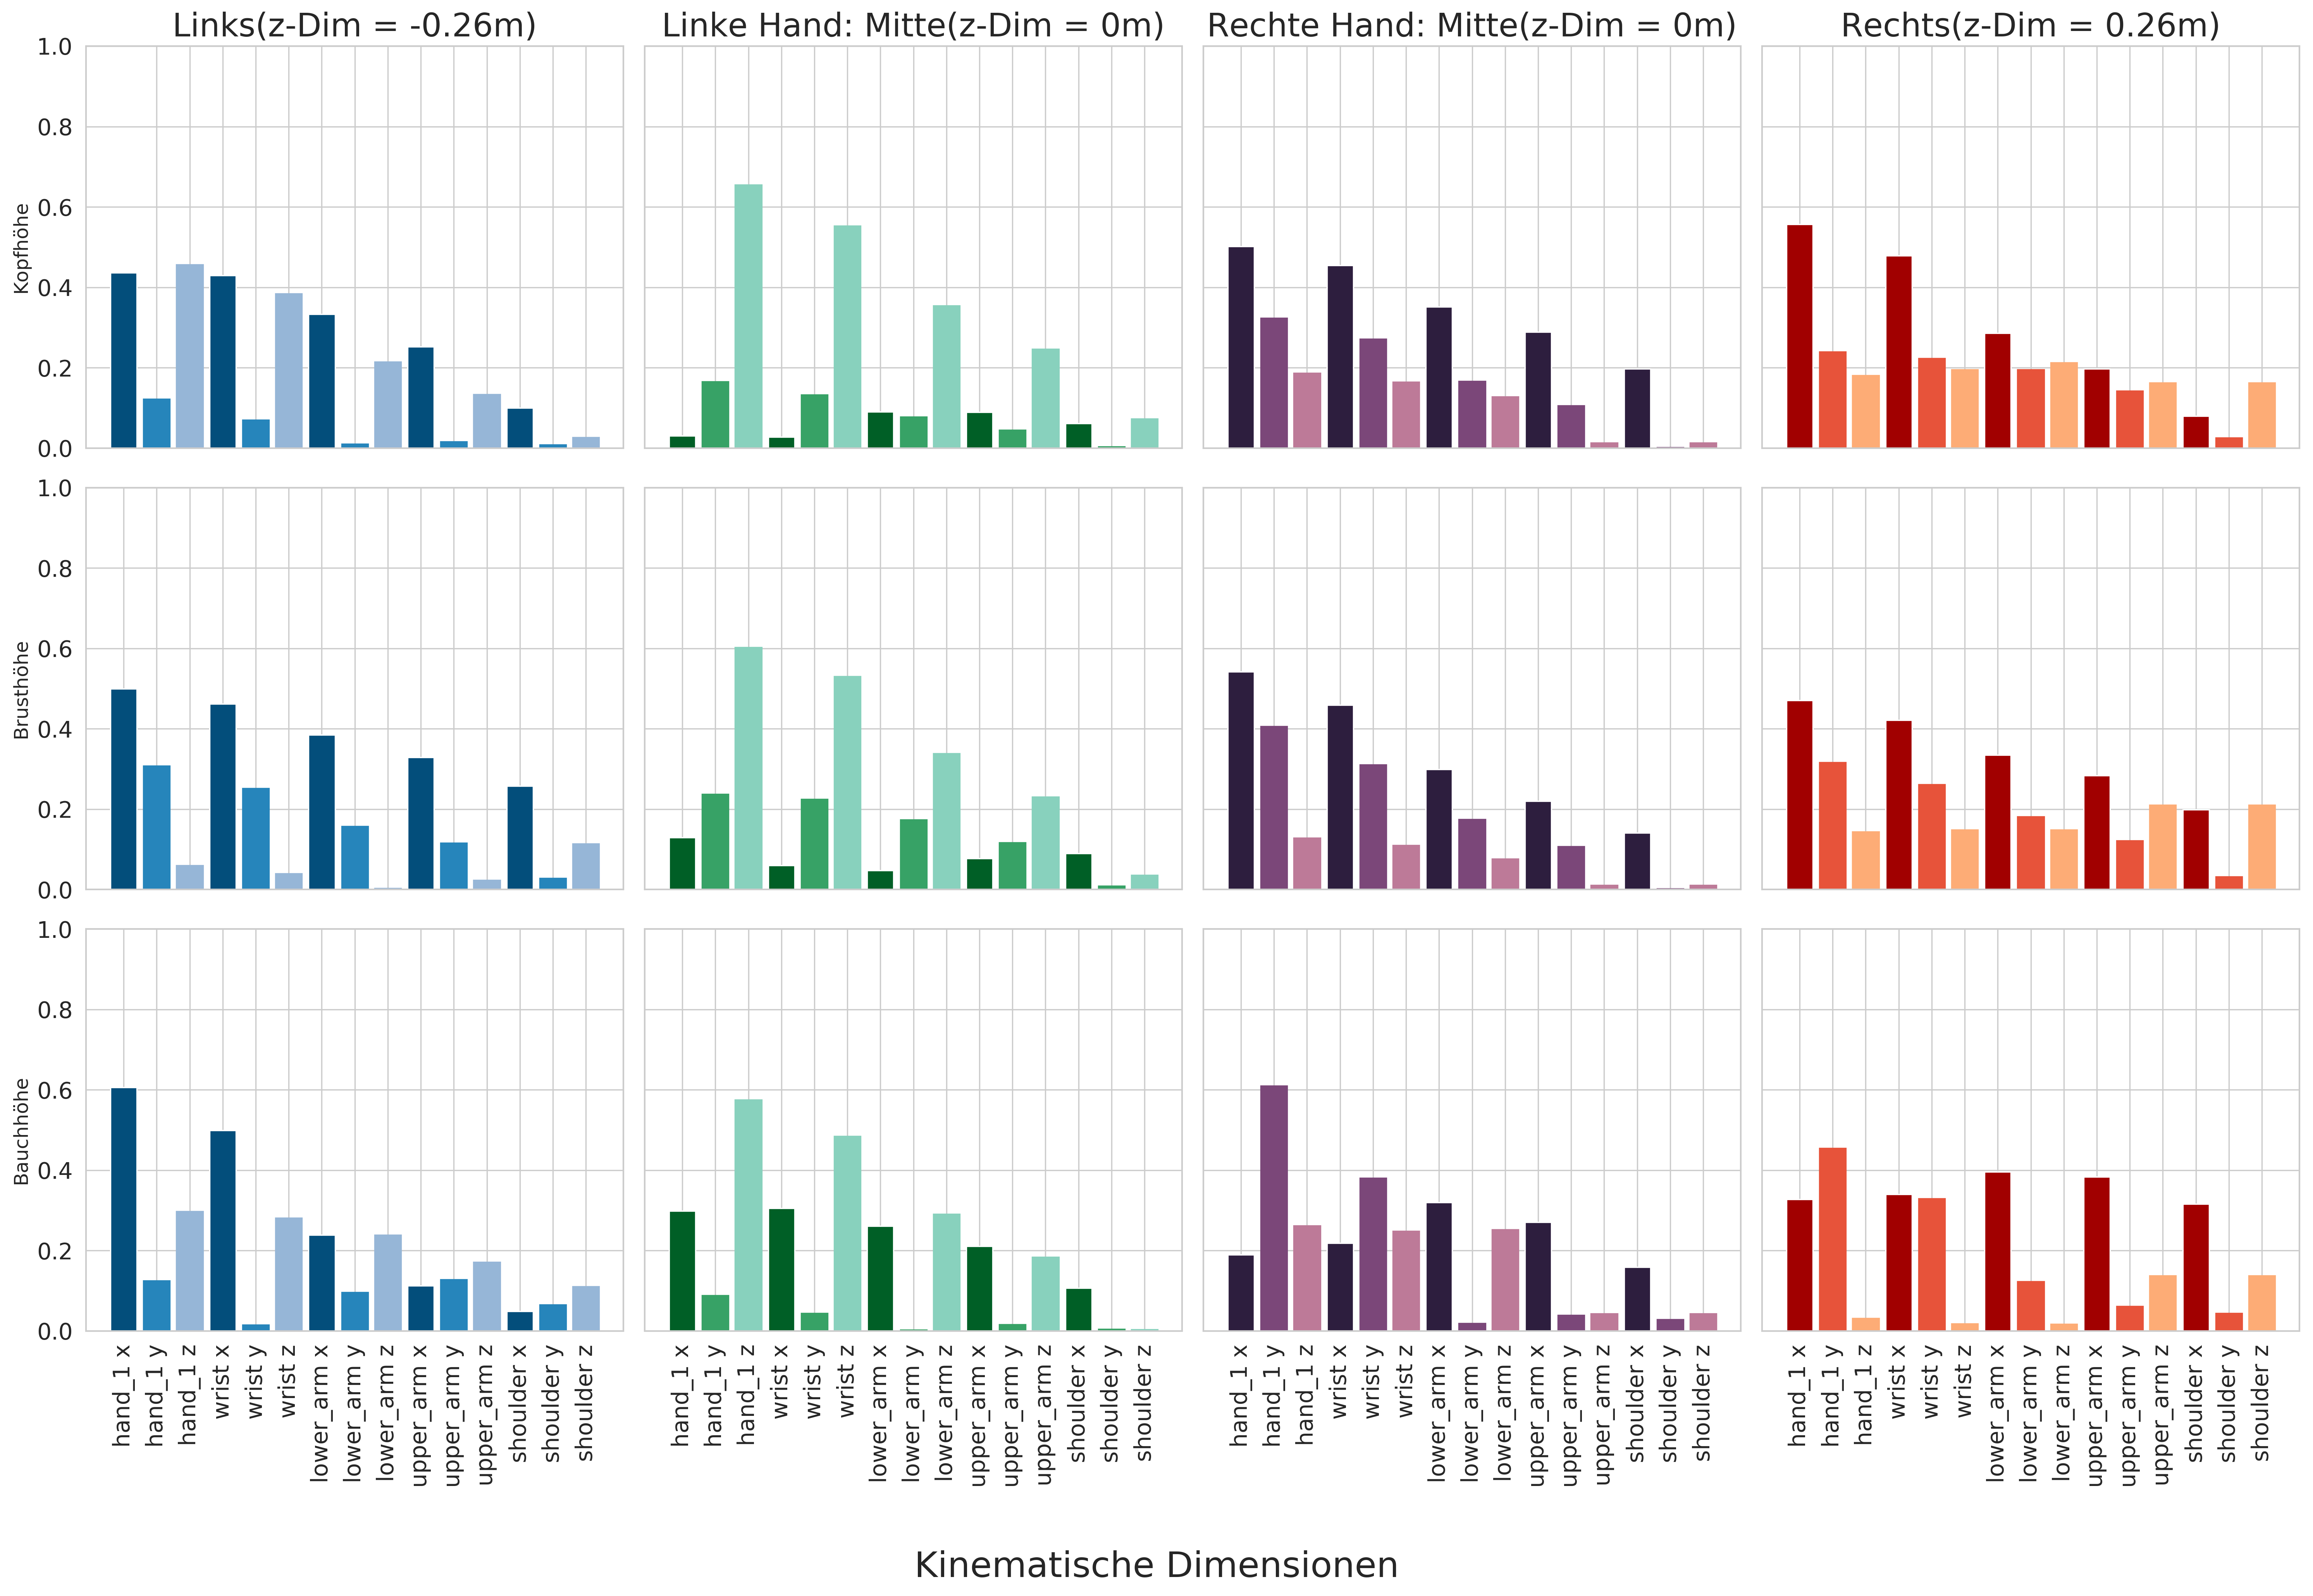

In [9]:
dir_ = '/home/michael/Desktop/model_evd/2H/*'
df_r1 = pd.DataFrame()
subjects_info = pd.DataFrame()
path = '/home/michael/Desktop/model_evd/2H/group_level/'

# /home/michael/Desktop/model_evd/1H/sub-01/l1/sub-01_l1model_evidence.csv
handedness = 'r'
for subject in (glob.glob(dir_)):
#     print(subject)
    subject_id = subject.split('/')[-1]
#     print(subject_id)
    
#     if subject_id == 'sub-09':

#         path = path+subject_id+'/'

    for filename in (glob.glob(subject+'/*')):
#         print(filename)
        pos_name = filename.split('/')[-1]
        print(pos_name)

        for x in (glob.glob(filename+'/*')):
            if x.split('_')[-2] == 'VT' and x.split('_')[-1] == 'matrix.csv':
#                 print('events')
#                 print(x)
                print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                vt = pd.read_csv(x, encoding='utf-8')
                vt = np.abs(np.array(vt))
                vt = vt[1,:]
#                 display(vt)

#                 vt = np.abs(vt[7,:])

            elif x.split('_')[-2] == 'sigma' and x.split('_')[-1] == 'matrix.csv':
    #                 print('events')
    #                 print(x)
                print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                s = pd.read_csv(x, encoding='utf-8')
                s = np.array(s)
# #                 logPD = np.array(logPD)
# #                 prinlogPD.l
#                 print(logPD)
#                 print(len(logPD))
        
        if pos_name == 'r1':
            r1_vt = vt
        elif pos_name == 'r2':
            r2_vt = vt
        elif pos_name == 'r3':
            r3_vt = vt
        elif pos_name == 'm1_l':
            m1_l_vt = vt
        elif pos_name == 'm2_l':
            m2_l_vt = vt
        elif pos_name == 'm3_l':
            m3_l_vt = vt
        elif pos_name == 'm1_r':
            m1_r_vt = vt
        elif pos_name == 'm2_r':
            m2_r_vt = vt
        elif pos_name == 'm3_r':
            m3_r_vt = vt
        elif pos_name == 'l1':
            l1_vt = vt
        elif pos_name == 'l2':
            l2_vt = vt
    #             print('l2')
        elif pos_name == 'l3':
            l3_vt = vt
#             print('here')

    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 13), gridspec_kw={'width_ratios': [5,5,5,5]})
    plt.subplots_adjust(wspace=-0.2)


    ax[0][3].bar(range(len(r1_vt)),r1_vt,color=reds[10])
    ax[0][3].set_xticks(np.arange(0, (len(r1_vt)), 1))
    ax[0][3].set_ylim(-0,1)
    ax[0][3].set_title('Rechts(z-Dim = 0.26m)')

    ax[0][2].bar(range(len(m1_r_vt)),m1_r_vt,color=purples[10])
    ax[0][2].set_ylim(-0,1)
    ax[0][2].set_xticks(np.arange(0, (len(m1_r_vt)), 1))
    ax[0][2].set_title('Rechte Hand: Mitte(z-Dim = 0m)')
    
    ax[0][1].bar(range(len(m1_l_vt)),m1_l_vt,color=greens[10])
    ax[0][1].set_ylim(-0,1)
    ax[0][1].set_xticks(np.arange(0, (len(m1_l_vt)), 1))
    ax[0][1].set_title('Linke Hand: Mitte(z-Dim = 0m)')


    ax[0][0].bar(range(len(l1_vt)),l1_vt,color=blues[10])
    ax[0][0].set_ylim(-0,1)
    ax[0][0].set_xticks(np.arange(1, (len(l1_vt)), 1))
    ax[0][0].set_title('Links(z-Dim = -0.26m)')
    ax[0][0].set_ylabel('Kopfhöhe')

    ax[1][3].bar(range(len(r2_vt)),r2_vt,color=reds[10])
    ax[1][3].set_ylim(-0,1)
    ax[1][3].set_xticks(np.arange(0, (len(r2_vt)), 1))

    ax[1][2].bar(range(len(m2_r_vt)),m2_r_vt,color=purples[10])
    ax[1][2].set_ylim(-0,1)
    ax[1][2].set_xticks(np.arange(0, (len(m2_r_vt)), 1))
    
    ax[1][1].bar(range(len(m2_l_vt)),m2_l_vt,color=greens[10])
    ax[1][1].set_ylim(-0,1)
    ax[1][1].set_xticks(np.arange(0, (len(m2_l_vt)), 1))


    ax[1][0].bar(range(len(l2_vt)),l2_vt,color=blues[10])
    ax[1][0].set_ylim(-0,1)
    ax[1][0].set_xticks(np.arange(0, (len(l2_vt)), 1))
    ax[1][0].set_ylabel('Brusthöhe')



    ax[2][3].bar(range(len(r3_vt)),r3_vt,color=reds[10])
    ax[2][3].set_ylim(-0,1)
    ax[2][3].set_xticks(np.arange(0, (len(r3_vt)), 1))
    ax[2][3].set_xticklabels(labels, rotation=90)

    ax[2][2].bar(range(len(m3_r_vt)),m3_r_vt,color=purples[10])
    ax[2][2].set_ylim(0,1)
    ax[2][2].set_xticks(np.arange(0, (len(m3_r_vt)), 1))
    ax[2][2].set_xticklabels(labels, rotation=90)

    
    ax[2][1].bar(range(len(m3_l_vt)),m3_l_vt,color=greens[10])
    ax[2][1].set_ylim(0,1)
    ax[2][1].set_xticks(np.arange(0, (len(m3_l_vt)), 1))
    ax[2][1].set_xticklabels(labels, rotation=90)


    ax[2][0].bar(range(len(l3_vt)),l3_vt,color=blues[10])
    ax[2][0].set_ylim(-0,1)
    ax[2][0].set_xticks(np.arange(0, (len(l3_vt)), 1))

    # COlor bars
    ax[2][0].set_xticklabels(labels, rotation=90)
    ax[2][0].get_children()[1].set_color(blues[7]) 
    ax[2][0].get_children()[2].set_color(blues[4]) 
    ax[2][0].get_children()[4].set_color(blues[7]) 
    ax[2][0].get_children()[5].set_color(blues[4]) 
    ax[2][0].get_children()[7].set_color(blues[7]) 
    ax[2][0].get_children()[8].set_color(blues[4]) 
    ax[2][0].get_children()[10].set_color(blues[7]) 
    ax[2][0].get_children()[11].set_color(blues[4]) 
    ax[2][0].get_children()[13].set_color(blues[7]) 
    ax[2][0].get_children()[14].set_color(blues[4]) 


    ax[1][0].get_children()[1].set_color(blues[7]) 
    ax[1][0].get_children()[2].set_color(blues[4]) 
    ax[1][0].get_children()[4].set_color(blues[7]) 
    ax[1][0].get_children()[5].set_color(blues[4]) 
    ax[1][0].get_children()[7].set_color(blues[7]) 
    ax[1][0].get_children()[8].set_color(blues[4]) 
    ax[1][0].get_children()[10].set_color(blues[7]) 
    ax[1][0].get_children()[11].set_color(blues[4]) 
    ax[1][0].get_children()[13].set_color(blues[7]) 
    ax[1][0].get_children()[14].set_color(blues[4]) 



    ax[0][0].get_children()[1].set_color(blues[7]) 
    ax[0][0].get_children()[2].set_color(blues[4]) 
    ax[0][0].get_children()[4].set_color(blues[7]) 
    ax[0][0].get_children()[5].set_color(blues[4]) 
    ax[0][0].get_children()[7].set_color(blues[7]) 
    ax[0][0].get_children()[8].set_color(blues[4]) 
    ax[0][0].get_children()[10].set_color(blues[7]) 
    ax[0][0].get_children()[11].set_color(blues[4]) 
    ax[0][0].get_children()[13].set_color(blues[7]) 
    ax[0][0].get_children()[14].set_color(blues[4]) 



    # COlor bars
    ax[2][1].set_xticklabels(labels, rotation=90)
    ax[2][1].get_children()[1].set_color(greens[7]) 
    ax[2][1].get_children()[2].set_color(greens[4]) 
    ax[2][1].get_children()[4].set_color(greens[7]) 
    ax[2][1].get_children()[5].set_color(greens[4]) 
    ax[2][1].get_children()[7].set_color(greens[7]) 
    ax[2][1].get_children()[8].set_color(greens[4]) 
    ax[2][1].get_children()[10].set_color(greens[7]) 
    ax[2][1].get_children()[11].set_color(greens[4]) 
    ax[2][1].get_children()[13].set_color(greens[7]) 
    ax[2][1].get_children()[14].set_color(greens[4]) 


    ax[1][1].get_children()[1].set_color(greens[7]) 
    ax[1][1].get_children()[2].set_color(greens[4]) 
    ax[1][1].get_children()[4].set_color(greens[7]) 
    ax[1][1].get_children()[5].set_color(greens[4]) 
    ax[1][1].get_children()[7].set_color(greens[7]) 
    ax[1][1].get_children()[8].set_color(greens[4]) 
    ax[1][1].get_children()[10].set_color(greens[7]) 
    ax[1][1].get_children()[11].set_color(greens[4]) 
    ax[1][1].get_children()[13].set_color(greens[7]) 
    ax[1][1].get_children()[14].set_color(greens[4]) 



    ax[0][1].get_children()[1].set_color(greens[7]) 
    ax[0][1].get_children()[2].set_color(greens[4]) 
    ax[0][1].get_children()[4].set_color(greens[7]) 
    ax[0][1].get_children()[5].set_color(greens[4]) 
    ax[0][1].get_children()[7].set_color(greens[7]) 
    ax[0][1].get_children()[8].set_color(greens[4]) 
    ax[0][1].get_children()[10].set_color(greens[7]) 
    ax[0][1].get_children()[11].set_color(greens[4]) 
    ax[0][1].get_children()[13].set_color(greens[7]) 
    ax[0][1].get_children()[14].set_color(greens[4]) 



    # COlor bars
    ax[2][2].set_xticklabels(labels, rotation=90)
    ax[2][2].get_children()[1].set_color(purples[7]) 
    ax[2][2].get_children()[2].set_color(purples[4]) 
    ax[2][2].get_children()[4].set_color(purples[7]) 
    ax[2][2].get_children()[5].set_color(purples[4]) 
    ax[2][2].get_children()[7].set_color(purples[7]) 
    ax[2][2].get_children()[8].set_color(purples[4]) 
    ax[2][2].get_children()[10].set_color(purples[7]) 
    ax[2][2].get_children()[11].set_color(purples[4]) 
    ax[2][2].get_children()[13].set_color(purples[7]) 
    ax[2][2].get_children()[14].set_color(purples[4]) 


    ax[1][2].get_children()[1].set_color(purples[7]) 
    ax[1][2].get_children()[2].set_color(purples[4]) 
    ax[1][2].get_children()[4].set_color(purples[7]) 
    ax[1][2].get_children()[5].set_color(purples[4]) 
    ax[1][2].get_children()[7].set_color(purples[7]) 
    ax[1][2].get_children()[8].set_color(purples[4]) 
    ax[1][2].get_children()[10].set_color(purples[7]) 
    ax[1][2].get_children()[11].set_color(purples[4]) 
    ax[1][2].get_children()[13].set_color(purples[7]) 
    ax[1][2].get_children()[14].set_color(purples[4]) 



    ax[0][2].get_children()[1].set_color(purples[7]) 
    ax[0][2].get_children()[2].set_color(purples[4]) 
    ax[0][2].get_children()[4].set_color(purples[7]) 
    ax[0][2].get_children()[5].set_color(purples[4]) 
    ax[0][2].get_children()[7].set_color(purples[7]) 
    ax[0][2].get_children()[8].set_color(purples[4]) 
    ax[0][2].get_children()[10].set_color(purples[7]) 
    ax[0][2].get_children()[11].set_color(purples[4]) 
    ax[0][2].get_children()[13].set_color(purples[7]) 
    ax[0][2].get_children()[14].set_color(purples[4]) 
    

    # COlor bars
    ax[2][3].set_xticklabels(labels, rotation=90)
    ax[2][3].get_children()[1].set_color(reds[7]) 
    ax[2][3].get_children()[2].set_color(reds[4]) 
    ax[2][3].get_children()[4].set_color(reds[7]) 
    ax[2][3].get_children()[5].set_color(reds[4]) 
    ax[2][3].get_children()[7].set_color(reds[7]) 
    ax[2][3].get_children()[8].set_color(reds[4]) 
    ax[2][3].get_children()[10].set_color(reds[7]) 
    ax[2][3].get_children()[11].set_color(reds[4]) 
    ax[2][3].get_children()[13].set_color(reds[7]) 
    ax[2][3].get_children()[14].set_color(reds[4]) 


    ax[1][3].get_children()[1].set_color(reds[7]) 
    ax[1][3].get_children()[2].set_color(reds[4]) 
    ax[1][3].get_children()[4].set_color(reds[7]) 
    ax[1][3].get_children()[5].set_color(reds[4]) 
    ax[1][3].get_children()[7].set_color(reds[7]) 
    ax[1][3].get_children()[8].set_color(reds[4]) 
    ax[1][3].get_children()[10].set_color(reds[7]) 
    ax[1][3].get_children()[11].set_color(reds[4]) 
    ax[1][3].get_children()[13].set_color(reds[7]) 
    ax[1][3].get_children()[14].set_color(reds[4]) 



    ax[0][3].get_children()[1].set_color(reds[7]) 
    ax[0][3].get_children()[2].set_color(reds[4]) 
    ax[0][3].get_children()[4].set_color(reds[7]) 
    ax[0][3].get_children()[5].set_color(reds[4]) 
    ax[0][3].get_children()[7].set_color(reds[7]) 
    ax[0][3].get_children()[8].set_color(reds[4]) 
    ax[0][3].get_children()[10].set_color(reds[7]) 
    ax[0][3].get_children()[11].set_color(reds[4]) 
    ax[0][3].get_children()[13].set_color(reds[7]) 
    ax[0][3].get_children()[14].set_color(reds[4]) 

#     labels, rotation=70
    ax[2][0].set_ylabel('Bauchhöhe')
#     ax[2][0].legend(labels)
#     ax[2][1].set_xlabel('Kinematische Dimensionen')
    fig.suptitle('Kinematische Dimensionen', y=-0.03, fontsize=22)




    ax[1][0].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )  
    ax[0][0].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )
    ax[0][1].tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )   
    ax[0][1].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )
    ax[0][2].tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )     
    ax[0][2].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )     
    ax[0][3].tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )     
    ax[0][3].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )
    ax[1][1].tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )    
    ax[1][1].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )
    
    ax[1][2].tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )
    ax[1][2].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )
    ax[1][3].tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )   
    ax[1][3].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )
    ax[2][1].tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    ) 
    ax[2][1].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='on', # labels along the bottom edge are off))
        labelleft='off',
        labelrotation=90
    )
    ax[2][2].tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    )  
    ax[2][2].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='on', # labels along the bottom edge are off))
        labelleft='off',
        labelrotation=90
    )
    ax[2][3].tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off', # labels along the bottom edge are off))
        labelleft='off'
    ) 
    ax[2][3].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='off',      # ticks along the bottom edge are off
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='on', # labels along the bottom edge are off))
        labelleft='off',
        labelrotation=90
    )
    
    fig.savefig(path+'/vts/vt2/'+subject_id+'_singular_vector2.png')
    plt.show()

